# Figures

This notebook contains the code necessary to most of the figures for the Ancient Genotyped Variants Proxy Catalog project. I have organized sections by order of appearance in the manuscript. Use the Table of Contents below to navigate to specific plots.

## Table of Contents

- [Notebook Setup](#notebooksetup)
- [Proportion TopLD Variants Among MAF Classes](#proportiontopldvariantsamongmafclasses)
- [TopLD Variants in LD with AGVs](#topldvariantsinldwithagvs)
    - [Common Variant Proportions](#commonvariantproportions)
    - [Proportions per Ancestry Group by MAF](#proportionsperancestrygroupbyMAF)
- [Evaluation](#evaluation)
- [AGVs in TopLD](#agvsintopld)
    - [AGVs TopLD Presence by Ancestry Group](#agvstopldpresencebyancestrygroup)
    - [AGV Alleles Frequencies](#agvallelefrequencies)
    - [AGV Allele Frequencies by TopLD Presence/Absence](#agvallelefrequenciesbytopldpresenceabsence)
- [AGV Age Estimates](#agvagestimates)
- [Allele Frequency Trajectory Examples](#allelefrequencytrajectoryexamples)
- [HGD Quality Scores vs. Allele Age](#hgdqualityscoresvsalleleage)
- [HGD Allele Age by Data Source](#hgdalleleagebydatasource)

## Notebook Setup <a class = 'anchor' id = 'notebooksetup'></a>

Load libraries, set up Arial font, themes, and the recurring ancestry group palette.

In [1]:
library(ComplexUpset)
library(cowplot)
library(dplyr)
library(ggplot2)
library(hexbin)
library(scales)
library(showtext)
library(data.table)
library(tidyr)

options(scipen=999)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: sysfonts

Loading required package: showtextdb


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [2]:
setwd('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog')

In [3]:
font_add('Arial', '~/fonts/arial.ttf')
showtext_auto()
showtext_opts(dpi = 300)

In [4]:
fig_theme = theme_classic() + theme(axis.line.x.bottom = element_line(size = (0.125/0.377)),
                                      axis.line.y.left = element_line(size = (0.125/0.377)),
                                      axis.title = element_text(size = 10), 
                                      axis.text.x = element_text(size = 9), 
                                      axis.text.y = element_text(size = 9),
                                      axis.ticks = element_line(size = (0.125/0.377)),
                                      axis.title.x = element_text(margin = margin(t = 15, r = 0, b = 0, l = 0)),
                                      axis.title.y = element_text(margin = margin(t = 0, r = 15, b = 0, l = 0)),
                                      legend.position = 'none', 
                                      text = element_text(family = 'Arial'))

In [5]:
AFR_color <- '#ffcc00'
EAS_color <- '#00aad4'
EUR_color <- '#a02c89'
SAS_color <- '#5a2ca0'

## Proportion TopLD Variants Among MAF Classes <a class = 'anchor' id = 'proportiontopldvariantsamongmafclasses'></a>

In [6]:
proportion_TopLD_variants_per_ancestry_group_per_MAF_class <- read.csv('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/TopLD/proportion_TopLD_variants_per_ancestry_group_per_MAF_class.txt', sep = '\t', header = TRUE)
proportion_TopLD_variants_per_ancestry_group_per_MAF_class$ancestry_group <- factor(proportion_TopLD_variants_per_ancestry_group_per_MAF_class$ancestry_group, levels = c('SAS','EAS','AFR','EUR'))
proportion_TopLD_variants_per_ancestry_group_per_MAF_class$MAF_class <- factor(proportion_TopLD_variants_per_ancestry_group_per_MAF_class$MAF_class, levels = c('UR','R','LF','C'))
proportion_TopLD_variants_per_ancestry_group_per_MAF_class$color_ID <- c('A','B','C','D','E','F','G','H','I','J','K','L','M','N','O')
proportion_TopLD_variants_per_ancestry_group_per_MAF_class

ancestry_group MAF_class proportion color_ID
1  AFR            UR        0.512049   A       
2  AFR            R         0.230152   B       
3  AFR            LF        0.113081   C       
4  AFR            C         0.144717   D       
5  EAS            UR        0.530110   E       
6  EAS            R         0.248446   F       
7  EAS            C         0.159941   G       
8  EAS            LF        0.061503   H       
9  EUR            UR        0.897654   I       
10 EUR            R         0.043853   J       
11 EUR            LF        0.017851   K       
12 EUR            C         0.040642   L       
13 SAS            R         0.579107   M       
14 SAS            LF        0.135477   N       
15 SAS            C         0.285416   O

In [7]:
colors <- c('#fff6d5','#ffeeaa','#ffdd55','#ffcc00','#d5f6ff','#aaeeff','#2ad4ff','#00aad4','#f4d7ee','#e9afdd','#d35fbc','#a02c89','#c6afe9','#8d5fd3','#612daf')

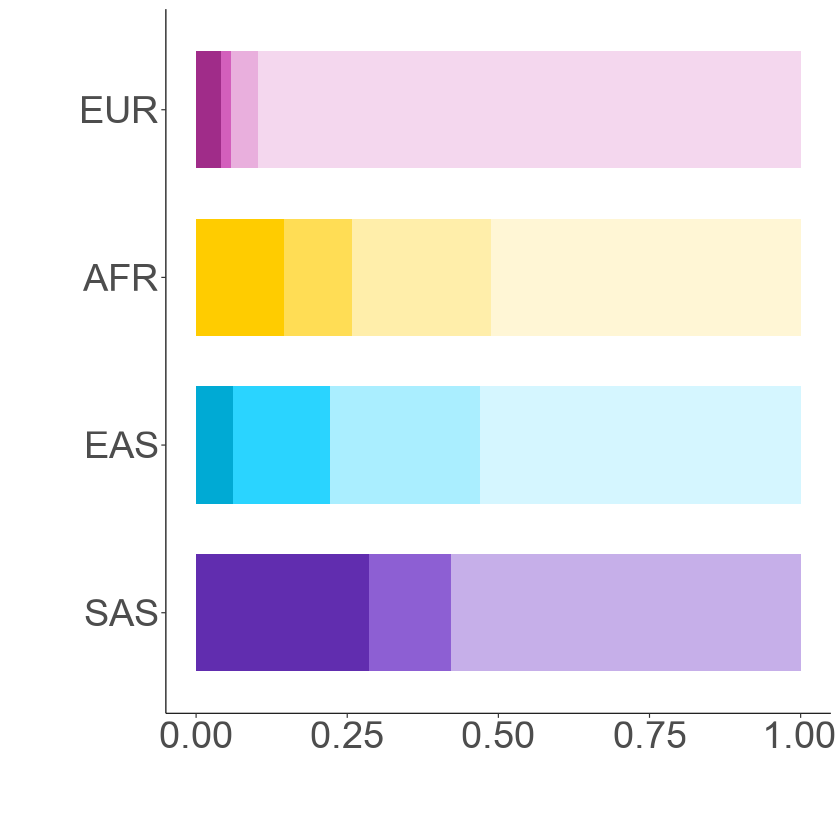

In [8]:
proportion_TopLD_variants_per_ancestry_group_per_MAF_class_plot <- ggplot(proportion_TopLD_variants_per_ancestry_group_per_MAF_class, aes(x = proportion, y = ancestry_group, fill = color_ID)) +
geom_bar(stat = 'identity', width = 0.7) + xlab('') + ylab('') + scale_fill_manual(values = colors) + fig_theme

proportion_TopLD_variants_per_ancestry_group_per_MAF_class_plot

R is not ordering low-frequency and common variants correctly in the plot. Let's manually re-order the dataframe and replot.

In [9]:
proportion_TopLD_variants_per_ancestry_group_per_MAF_class$MAF_class <- c('UR','R','LF','C','UR','R','LF','C','UR','R','LF','C','R','LF','C')
proportion_TopLD_variants_per_ancestry_group_per_MAF_class$proportion <- c(0.512049,0.230152,0.113081,0.144717,0.530110,0.248446,0.061503,0.159941,0.897654,0.043853,0.017851,0.040642,0.579107,0.135477,0.285416)

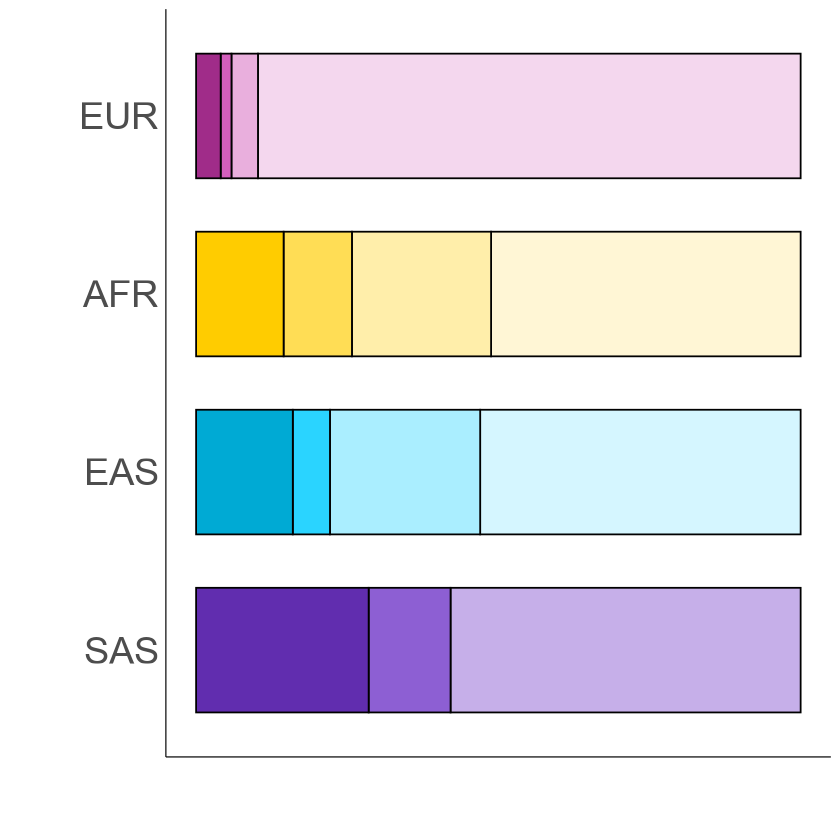

In [10]:
proportion_TopLD_variants_per_ancestry_group_per_MAF_class_plot <- ggplot(proportion_TopLD_variants_per_ancestry_group_per_MAF_class, aes(x = proportion, y = ancestry_group, fill = color_ID)) +
geom_bar(stat = 'identity', width = 0.7, color = 'black') + xlab('') + ylab('') + scale_fill_manual(values = colors) + fig_theme + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.ticks.y = element_blank())

proportion_TopLD_variants_per_ancestry_group_per_MAF_class_plot

In [11]:
pdf('figures/main_fig_components/proportion_TopLD_variants_per_ancestry_group_per_MAF_class.pdf', height = 6, width = 6)
proportion_TopLD_variants_per_ancestry_group_per_MAF_class_plot
dev.off()

png 
  2

## TopLD Variants in LD with AGVs <a class = 'anchor' id = 'topldvariantsinldwithagvs'></a>

In [12]:
proportion_TopLD_variants_in_LD_with_AGVs = read.csv('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/AGV_LD_variants/proportion_TopLD_variants_in_LD_with_AGVs.txt', sep = '\t', header = TRUE)
head(proportion_TopLD_variants_in_LD_with_AGVs)

ancestry_group MAF_class R2  proportion
1 AFR            UR        0.2 0.03529322
2 AFR            R         0.2 0.10720822
3 AFR            LF        0.2 0.43676849
4 AFR            C         0.2 0.88375901
5 EAS            UR        0.2 0.06694301
6 EAS            R         0.2 0.12711107

### Common Variant Proportions <a class = 'anchor' id = 'commonvariantproportions'></a>

In [13]:
x_axis_label <- bquote(paste('Minimum R'^'2',' between Modern Variants and AGVs'))

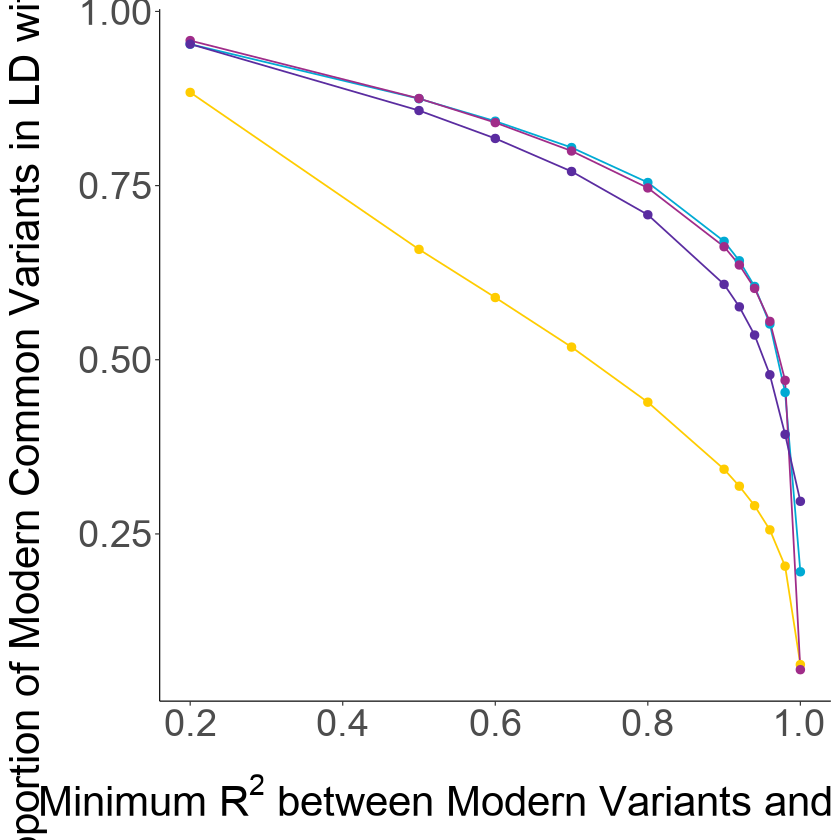

In [14]:
proportion_TopLD_common_variants_in_LD_with_AGV_plot <- ggplot(subset(proportion_TopLD_variants_in_LD_with_AGVs, MAF_class == 'C'), aes(x = R2, y = proportion, color = ancestry_group)) + 
geom_line(show.legend = F) + geom_point(size = 2) + xlab(x_axis_label) + ylab('Proportion of Modern Common Variants in LD with an AGV') + 
scale_color_manual(values = c(AFR_color,EAS_color,EUR_color,SAS_color)) + fig_theme

proportion_TopLD_common_variants_in_LD_with_AGV_plot 

### Proportions per Ancestry Group by MAF <a class = 'anchor' id = 'proportionsperancestrygroupbyMAF'></a>

In [15]:
plot_for_legend <- ggplot(data = subset(proportion_TopLD_variants_in_LD_with_AGVs, ancestry_group == 'AFR'), aes(x = R2, y = proportion, linetype = MAF_class)) + 
    geom_line(color = 'black') + geom_point(show.legend = F, size = 2, color = 'black') + coord_cartesian(ylim = c(0,1)) + xlab(x_axis_label) + ylab('Proportion of Modern Variants in LD with an AGV') + 
    scale_linetype_manual(labels = c('Common','Low-frequency','Rare','Ultra-rare'), values = c('solid','longdash','dashed','dotted')) + theme_classic() + theme(axis.line.x.bottom = element_line(size = (0.125/0.377)),
    axis.line.y.left = element_line(size = (0.125/0.377)), axis.title = element_text(size = 10), axis.text.x = element_text(size = 9), 
    axis.text.y = element_text(size = 9), axis.ticks = element_line(size = (0.125/0.377)), axis.title.x = element_text(margin = margin(t = 15, r = 0, b = 0, l = 0)),
    axis.title.y = element_text(margin = margin(t = 0, r = 15, b = 0, l = 0)), legend.position = 'bottom', legend.spacing.x = unit(0.2, 'cm'), legend.text = element_text(size = 9, family = 'Arial', margin = margin(r = 15, unit = 'pt')),
    legend.title = element_blank(), text = element_text(family = 'Arial'))

legend <- get_legend(plot_for_legend)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

In [16]:
proportion_TopLD_variants_in_LD_with_AGVs_per_ancestry_group_by_MAF_plot <- function(ancestry_group, color, linetypes) {
    ggplot(data = subset(proportion_TopLD_variants_in_LD_with_AGVs, ancestry_group == ancestry_group), aes(x = R2, y = proportion, linetype = MAF_class)) + 
    geom_line(color = color) + geom_point(show.legend = F, size = 2, color = color) + coord_cartesian(ylim = c(0,1)) + xlab(x_axis_label) + ylab('Proportion of TOPMed Variants\nwith AADR Proxy') + 
    scale_linetype_manual(values = linetypes) + fig_theme + theme(axis.title.x = element_blank(), axis.title.y = element_blank())
}

In [17]:
AFR_proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot <- proportion_TopLD_variants_in_LD_with_AGVs_per_ancestry_group_by_MAF_plot('AFR',AFR_color,c('solid','longdash','dashed','dotted'))
EAS_proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot <- proportion_TopLD_variants_in_LD_with_AGVs_per_ancestry_group_by_MAF_plot('EAS',EAS_color,c('solid','longdash','dashed','dotted'))
EUR_proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot <- proportion_TopLD_variants_in_LD_with_AGVs_per_ancestry_group_by_MAF_plot('EUR',EUR_color,c('solid','longdash','dashed','dotted'))
SAS_proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot <- proportion_TopLD_variants_in_LD_with_AGVs_per_ancestry_group_by_MAF_plot('SAS',SAS_color,c('solid','longdash','dashed','dotted'))

In [18]:
x_axis_label = ggdraw() + draw_label(x_axis_label, fontfamily = 'Arial', size = 10, hjust = 0.5)
y_axis_label = ggdraw() + draw_label('Proportion of Modern Variants in LD with an AGV', fontfamily = 'Arial', size = 10, angle = 90, x = 0.5, hjust = 0.5)
inner_left <- plot_grid(AFR_proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot, NULL, EUR_proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot, ncol = 1, rel_heights = c(0.48,0.04,0.48))
inner_right <- plot_grid(EAS_proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot, NULL, SAS_proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot, ncol = 1, rel_heights = c(0.48,0.04,0.48))
inner <- plot_grid(inner_left, NULL, inner_right, nrow = 1, rel_widths = c(0.48,0.04,0.48))
inner_with_x <- plot_grid(inner, NULL, x_axis_label, NULL, legend, ncol = 1, rel_heights = c(0.84,0.02,0.08,0.01,0.06))
inner_with_both <- plot_grid(y_axis_label, inner_with_x, nrow = 1, rel_widths = c(0.15,1))

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 11 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 11 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 11 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 11 rows containing missing values (geom_point).”


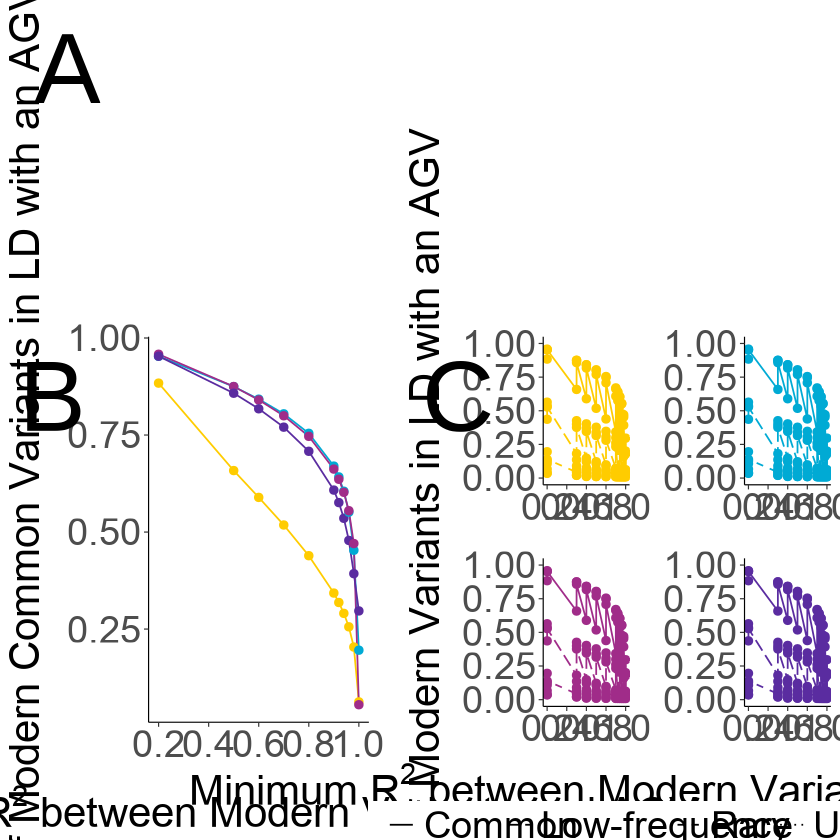

In [19]:
bottom_row <- plot_grid(proportion_TopLD_common_variants_in_LD_with_AGV_plot, NULL, inner_with_both, labels = c('B','','C'), label_size = 24, label_fontface = 'plain', nrow = 1, rel_widths = c(0.45,0.02,0.53))
plot <- plot_grid(NULL, bottom_row, labels = c('A'), label_size = 24, label_fontface = 'plain', ncol = 1, rel_heights = c(0.39,0.61))
plot

In [20]:
pdf('figures/main_fig_components/proportion_TopLD_variants_in_LD_with_AGVs_by_MAF_plot.pdf', height = 8, width = 10)
plot
dev.off()

png 
  2

## Evaluation <a class = 'anchor' id = 'evaluation'></a>

In [21]:
Loschbour_eval_stats = read.csv('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/evaluation/Loschbour_evaluation_statistics.txt', sep = '\t', header = FALSE)
colnames(Loschbour_eval_stats) <- c('LD_threshold','chr','N_partial_matches','N_complete_matches','N_evaluated')
Loschbour_eval_stats <- Loschbour_eval_stats %>% 
    group_by(LD_threshold) %>% 
    summarize(total_partial_matches = sum(N_partial_matches, na.rm = TRUE), total_complete_matches = sum(N_complete_matches, na.rm = TRUE), total_evaluated = sum(N_evaluated, na.rm = TRUE), .groups = "drop") %>%
    mutate(partial_matches_prop = total_partial_matches / total_evaluated, complete_matches_prop = total_complete_matches / total_evaluated)
Loschbour_eval_stats <- Loschbour_eval_stats %>% select(LD_threshold, partial_matches_prop, complete_matches_prop) %>%
  pivot_longer(cols = c(partial_matches_prop, complete_matches_prop), names_to = "match_type", values_to = "prop") %>%
  mutate(match_type = case_when(match_type == "partial_matches_prop" ~ "Partial Matches", match_type == "complete_matches_prop" ~ "Complete Matches"))
Loschbour_eval_stats

LD_threshold match_type       prop     
1  0.5          Partial Matches  0.9930215
2  0.5          Complete Matches 0.9466220
3  0.6          Partial Matches  0.9959556
4  0.6          Complete Matches 0.9634882
5  0.7          Partial Matches  0.9979629
6  0.7          Complete Matches 0.9773031
7  0.8          Partial Matches  0.9991380
8  0.8          Complete Matches 0.9874773
9  0.9          Partial Matches  0.9997109
10 0.9          Complete Matches 0.9947841

In [22]:
Ust_Ishim_eval_stats = read.csv('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/evaluation/Ust_Ishim_evaluation_statistics.txt', sep = '\t', header = FALSE)
colnames(Ust_Ishim_eval_stats) <- c('LD_threshold','chr','N_partial_matches','N_complete_matches','N_evaluated')
Ust_Ishim_eval_stats <- Ust_Ishim_eval_stats %>% 
    group_by(LD_threshold) %>% 
    summarize(total_partial_matches = sum(N_partial_matches, na.rm = TRUE), total_complete_matches = sum(N_complete_matches, na.rm = TRUE), total_evaluated = sum(N_evaluated, na.rm = TRUE), .groups = "drop") %>%
    mutate(partial_matches_prop = total_partial_matches / total_evaluated, complete_matches_prop = total_complete_matches / total_evaluated)
Ust_Ishim_eval_stats <- Ust_Ishim_eval_stats %>% select(LD_threshold, partial_matches_prop, complete_matches_prop) %>%
  pivot_longer(cols = c(partial_matches_prop, complete_matches_prop), names_to = "match_type", values_to = "prop") %>%
  mutate(match_type = case_when(match_type == "partial_matches_prop" ~ "Partial Matches", match_type == "complete_matches_prop" ~ "Complete Matches"))
Ust_Ishim_eval_stats

LD_threshold match_type       prop     
1  0.5          Partial Matches  0.9880246
2  0.5          Complete Matches 0.9006504
3  0.6          Partial Matches  0.9917226
4  0.6          Complete Matches 0.9226723
5  0.7          Partial Matches  0.9948614
6  0.7          Complete Matches 0.9436364
7  0.8          Partial Matches  0.9973515
8  0.8          Complete Matches 0.9616686
9  0.9          Partial Matches  0.9988684
10 0.9          Complete Matches 0.9782681

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

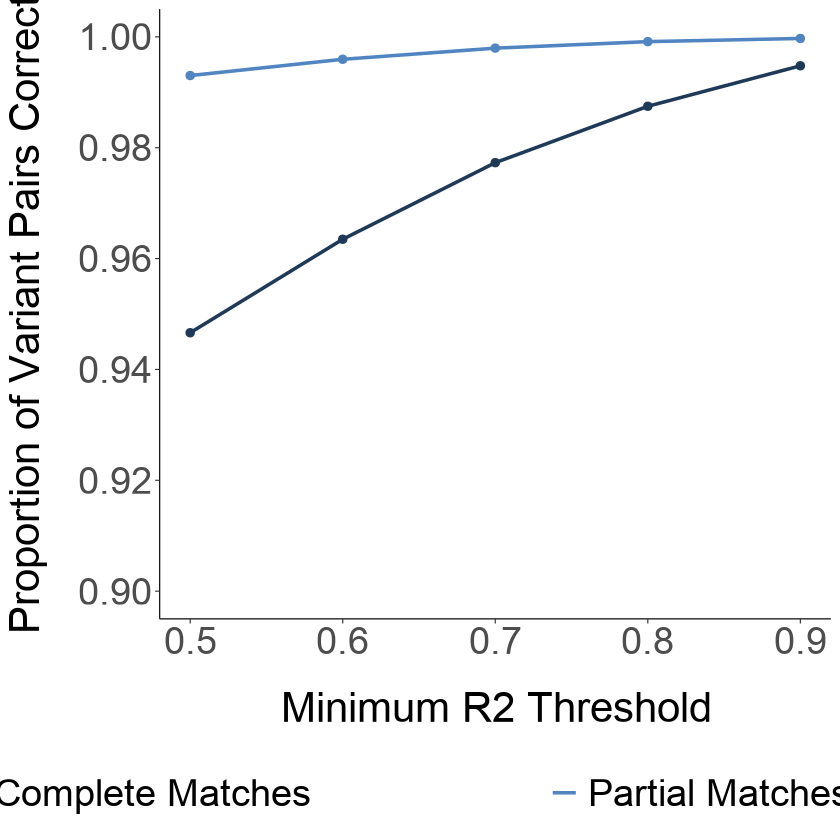

In [23]:
plot_for_legend <- ggplot(Loschbour_eval_stats, aes(x = LD_threshold, y = prop, color = match_type, group = match_type)) +
    geom_point(show.legend = F, size = 2) + geom_line(size = 1) + coord_cartesian(ylim = c(0.9,1)) +
    scale_y_continuous(breaks = seq(0, 1, 0.02)) + scale_color_manual(values = c('Complete Matches' = '#1f3a59', 'Partial Matches' = '#5085c2')) +
    xlab('Minimum R2 Threshold') + ylab('Proportion of Variant Pairs Correct') +
    fig_theme + theme_classic() + theme(axis.line.x.bottom = element_line(size = (0.125/0.377)),
    axis.line.y.left = element_line(size = (0.125/0.377)), axis.title = element_text(size = 10), axis.text.x = element_text(size = 9), 
    axis.text.y = element_text(size = 9), axis.ticks = element_line(size = (0.125/0.377)), axis.title.x = element_text(margin = margin(t = 15, r = 0, b = 0, l = 0)),
    axis.title.y = element_text(margin = margin(t = 0, r = 15, b = 0, l = 0)), legend.position = 'bottom', legend.spacing.x = unit(0.2, 'cm'), legend.text = element_text(size = 9, family = 'Arial', margin = margin(r = 15, unit = 'pt')),
    legend.title = element_blank(), text = element_text(family = 'Arial'))

plot_for_legend
legend <- get_legend(plot_for_legend)

In [24]:
evaluation_success_plot <- function(data, title) {
    ggplot(data, aes(x = LD_threshold, y = prop, color = match_type, group = match_type)) +
    geom_point(size = 2) + geom_line(size = 1) + coord_cartesian(ylim = c(0.9,1)) +
    scale_y_continuous(breaks = seq(0, 1, 0.02)) + scale_color_manual(values = c('Complete Matches' = '#1f3a59', 'Partial Matches' = '#5085c2')) +
    xlab('Minimum R2 Threshold') + ylab('Proportion of Variant Pairs Correct') + ggtitle(title) +
    fig_theme + theme(plot.title = element_text(family = 'Arial', hjust = 0.5, margin = margin(t = 0, r = 0, b = 30, l = 0), size = 10))
}

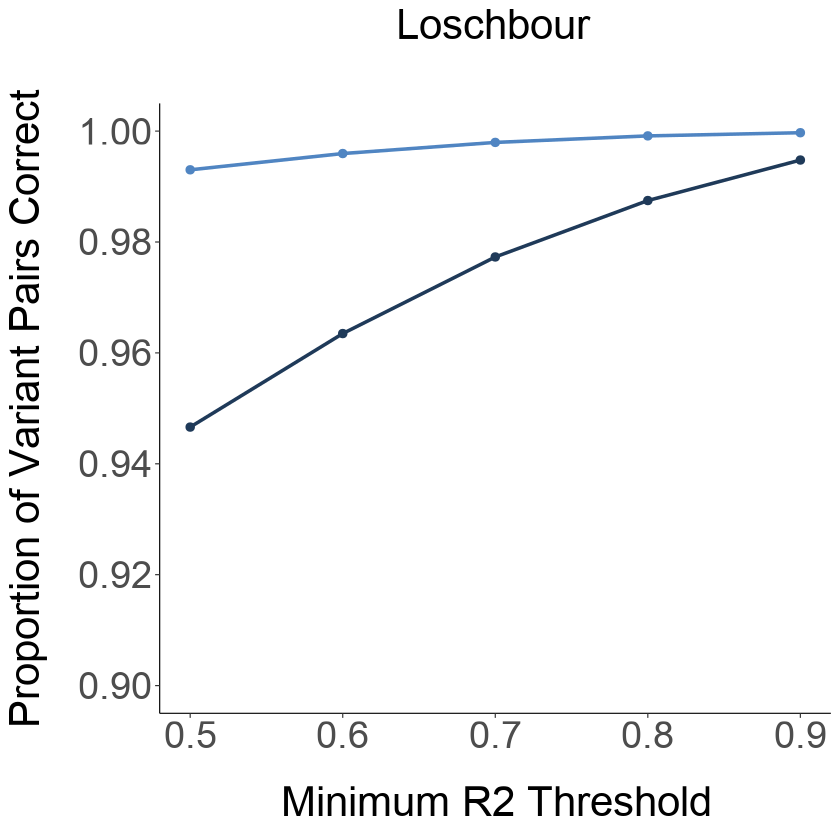

In [25]:
Loschbour_eval_plot <- evaluation_success_plot(Loschbour_eval_stats, 'Loschbour')
Loschbour_eval_plot

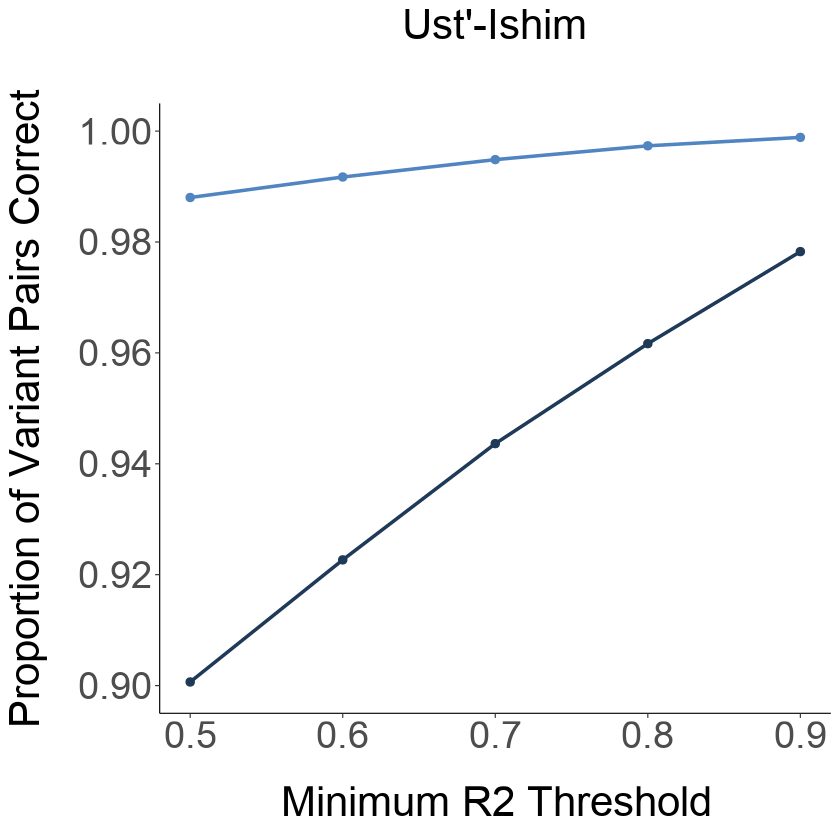

In [26]:
Ust_Ishim_eval_plot <- evaluation_success_plot(Ust_Ishim_eval_stats, 'Ust\'-Ishim')
Ust_Ishim_eval_plot

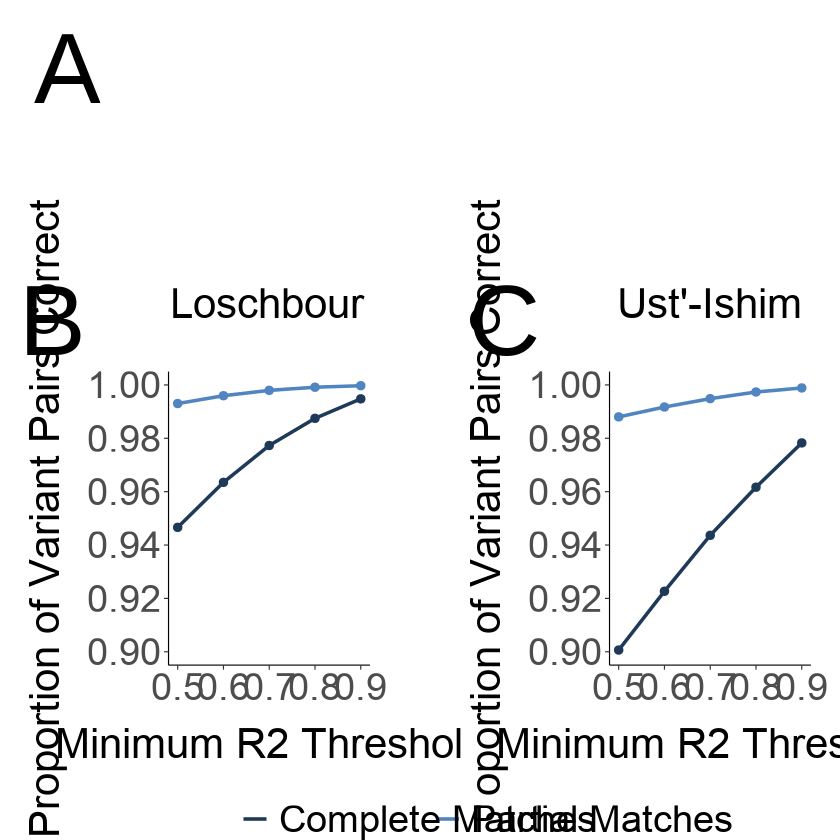

In [27]:
top_row <- plot_grid(NULL, labels = c('A'), label_size = 24, label_fontface = 'plain', nrow = 1)
middle_row <- plot_grid(Loschbour_eval_plot, NULL, Ust_Ishim_eval_plot, labels = c('B','','C'), label_size = 24, label_fontface = 'plain', nrow = 1, rel_widths = c(0.475,0.05,0.475), scale = 0.9)
bottom_row <- plot_grid(legend, nrow = 1)
plot <- plot_grid(top_row, middle_row, bottom_row, ncol = 1, rel_heights = c(0.3,0.65,0.05))
plot

In [28]:
pdf('figures/main_fig_components/evaluation.pdf', height = 5.5, width = 8)
plot
dev.off()

png 
  2

## AGVs in TopLD <a class = 'anchor' id = 'agvsintopld'></a>

In [29]:
AGVs = read.csv('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/AGVs/AGVs_hg38_annotated.txt.gz', sep = '\t', header = TRUE)
AGVs <- AGVs %>% mutate(across(everything(), ~ na_if(., "")))
AGVs$AF <- ifelse(!is.na(AGVs$AF), as.numeric(AGVs$AF), NA)
AGVs$AFR_AF <- ifelse(!is.na(AGVs$AFR_AF), as.numeric(AGVs$AFR_AF), NA)
AGVs$EAS_AF <- ifelse(!is.na(AGVs$EAS_AF), as.numeric(AGVs$EAS_AF), NA)
AGVs$EUR_AF <- ifelse(!is.na(AGVs$EUR_AF), as.numeric(AGVs$EUR_AF), NA)
AGVs$SAS_AF <- ifelse(!is.na(AGVs$SAS_AF), as.numeric(AGVs$SAS_AF), NA)
head(AGVs)

Warning message in ifelse(!is.na(AGVs$AF), as.numeric(AGVs$AF), NA):
“NAs introduced by coercion”
Warning message in ifelse(!is.na(AGVs$AFR_AF), as.numeric(AGVs$AFR_AF), NA):
“NAs introduced by coercion”
Warning message in ifelse(!is.na(AGVs$EAS_AF), as.numeric(AGVs$EAS_AF), NA):
“NAs introduced by coercion”
Warning message in ifelse(!is.na(AGVs$EUR_AF), as.numeric(AGVs$EUR_AF), NA):
“NAs introduced by coercion”
Warning message in ifelse(!is.na(AGVs$SAS_AF), as.numeric(AGVs$SAS_AF), NA):
“NAs introduced by coercion”


chr  pos    ref alt rsID        filter AF        AFR_AF    EAS_AF    
1 chr1 817186 G   A   rs3094315   PASS   0.7117540 0.4359100 0.88809700
2 chr1 841166 A   G   rs12124819  PASS   0.1721730 0.0458921 0.00134771
3 chr1 897538 T   C   rs28765502  PASS   0.3672790 0.5484910 0.16017000
4 chr1 906633 T   G   rs7419119   PASS   0.1911100 0.1390170 0.13274500
5 chr1 911484 G   C   rs950122    PASS   0.2179830 0.2712600 0.10347500
6 chr1 933923 C   T   rs113171913 PASS   0.0743305 0.0220791 0.01341250
  EUR_AF    SAS_AF    TopLD_presence  MAFs                    LDV_presence   
1 0.8257750 0.7912860 NA              NA                      NA             
2 0.2727950 0.0828844 AFR,EAS,EUR,SAS 0.013,0.001,0.25,0.071  AFR,EAS,EUR,SAS
3 0.2925760 0.2326840 AFR,EAS,EUR,SAS 0.398,0.145,0.292,0.222 AFR,EAS,EUR,SAS
4 0.2089380 0.2140760 AFR,EAS,EUR,SAS 0.126,0.13,0.217,0.197  AFR,EAS,EUR,SAS
5 0.1929260 0.2486520 AFR,EAS,EUR,SAS 0.274,0.107,0.195,0.274 AFR,EAS,EUR,SAS
6 0.0987195 0.1488370 AFR,EAS,EUR,SAS 0.043,0.069,0.26,0.335  AFR,EAS,EUR,SAS

### AGVs TopLD Presence by Ancestry Group <a class = 'anchor' id = 'agvstopldpresencebyancestrygroup'></a>

In [30]:
AGVs_TopLD_presence_for_upset <- AGVs %>%
  mutate(
    AFR = ifelse(grepl('AFR', TopLD_presence), 1, 0),
    EAS = ifelse(grepl('EAS', TopLD_presence), 1, 0),
    EUR = ifelse(grepl('EUR', TopLD_presence), 1, 0),
    SAS = ifelse(grepl('SAS', TopLD_presence), 1, 0)
  ) %>%
  select(AFR, EAS, EUR, SAS)

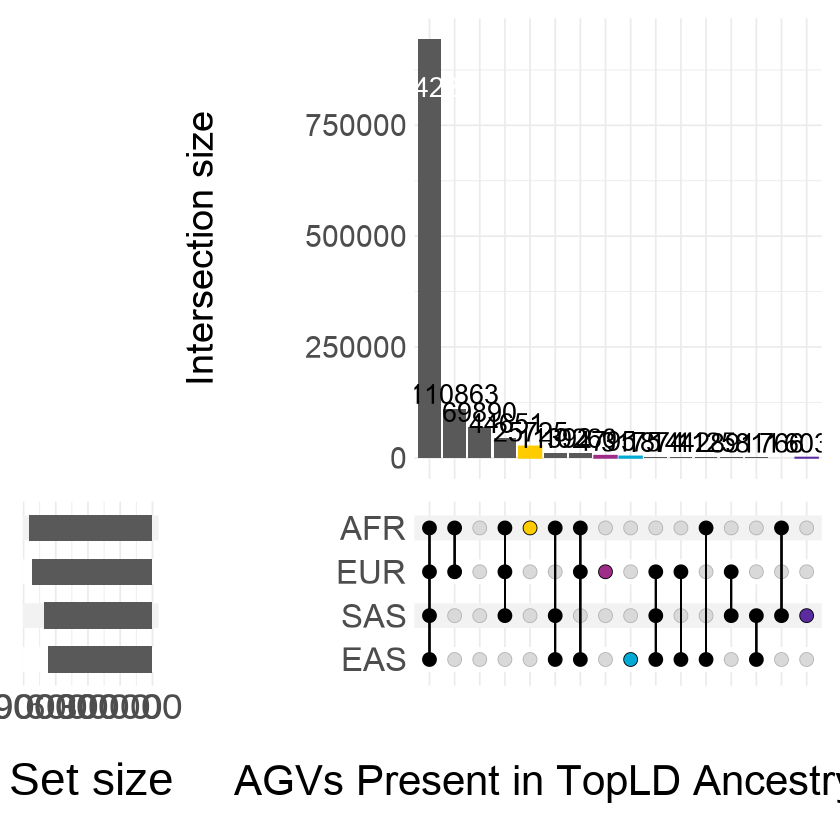

In [31]:
AGVs_TopLD_presence_upset_plot <- upset(AGVs_TopLD_presence_for_upset, intersect = c('AFR','EAS','EUR','SAS'), sort_sets = 'descending',
                      name = 'AGVs Present in TopLD Ancestry Groups', 
                      min_size = 0,
                      height_ratio = 0.4,
                      width_ratio = 0.25,
                      matrix = (intersection_matrix(geom = geom_point(size = 3))),
                      base_annotations = list('Intersection size' = intersection_size(text = list(family = 'Arial', size = 2.3))), # The size argument does not appear to respond to the ggplot .pt constant hence the different size here.
                      themes = upset_modify_themes(list('Intersection size' = theme(text = element_text(family = 'Arial', size = 9)),  
                                                       'intersections_matrix' = theme(text = element_text(family = 'Arial', size = 10)))),
                      queries = list(upset_query(intersect = c('AFR'), color = AFR_color, fill = AFR_color),
                                     upset_query(intersect = c('EAS'), color = EAS_color, fill = EAS_color),
                                     upset_query(intersect = c('EUR'), color = EUR_color, fill = EUR_color),
                                     upset_query(intersect = c('SAS'), color = SAS_color, fill = SAS_color)))

AGVs_TopLD_presence_upset_plot

In [32]:
pdf('figures/suppl_figs/AGVs_TopLD_ancestry_group_presence.pdf', height = 5, width = 10)
AGVs_TopLD_presence_upset_plot
dev.off()

png 
  2

### AGV Alleles Frequencies <a class = 'anchor' id = 'agvallelefrequencies'></a>

In [33]:
AGVs_allele_frequency_distribution_plot <- function(column, x_label, color) {
    N_non_NAs <- sum(!is.na(AGVs[[column]]))
    formatted_N_non_NAs <- format(N_non_NAs, big.mark = ",", scientific = FALSE)
    
    ggplot(AGVs, aes(x = .data[[column]])) + geom_density(fill = color, alpha = 0.6, size = (0.125/0.377)) + 
    xlab(x_label) + ylab('Density') + coord_cartesian(ylim = c(0,6)) + fig_theme + 
    annotate("text", x = 0.77, y = 6, label = paste("N =", formatted_N_non_NAs), size = 9/.pt, color = 'black', family = 'Arial')
}

Warning message:
“Removed 48455 rows containing non-finite values (stat_density).”


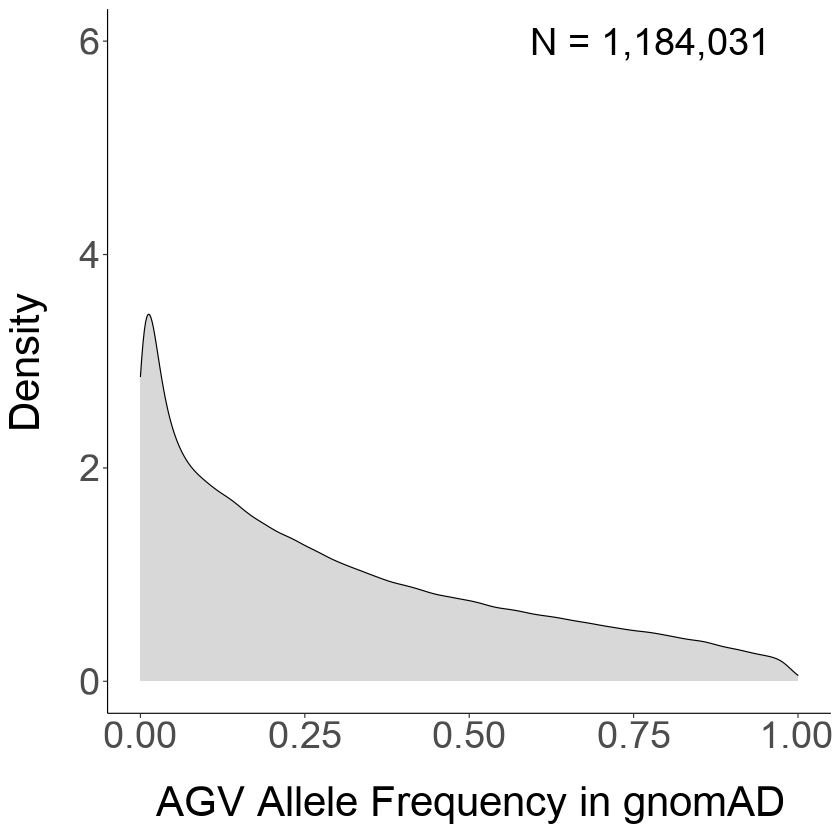

In [34]:
global_AGVs_AF_plot <- AGVs_allele_frequency_distribution_plot('AF', 'AGV Allele Frequency in gnomAD', 'grey')
global_AGVs_AF_plot

Warning message:
“Removed 48458 rows containing non-finite values (stat_density).”


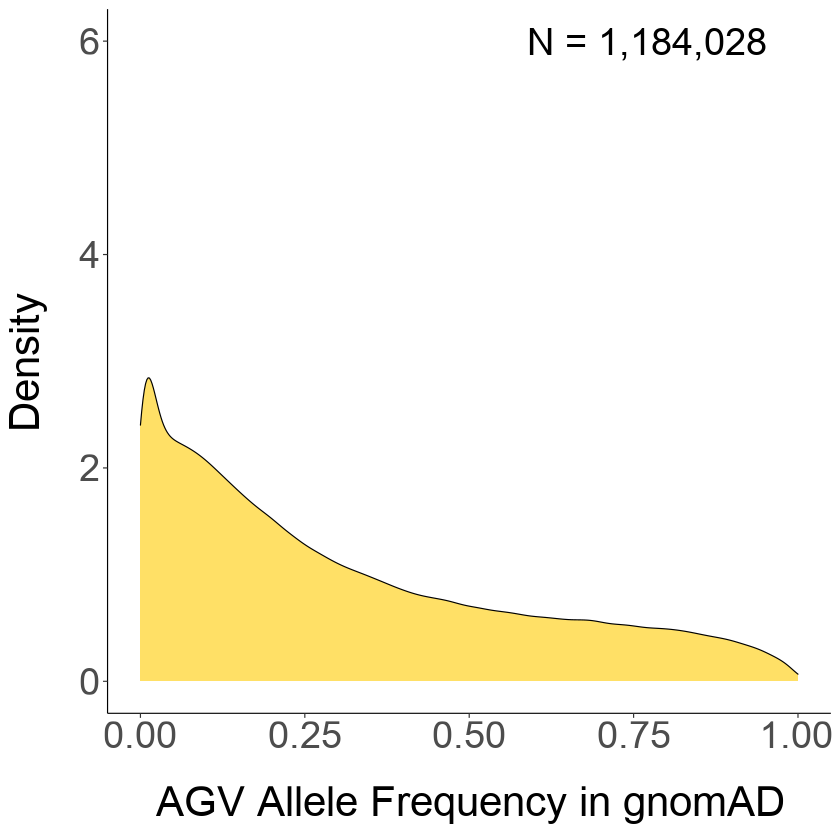

In [35]:
AFR_AGVs_AF_plot <- AGVs_allele_frequency_distribution_plot('AFR_AF', 'AGV Allele Frequency in gnomAD', AFR_color)
AFR_AGVs_AF_plot

Warning message:
“Removed 48464 rows containing non-finite values (stat_density).”


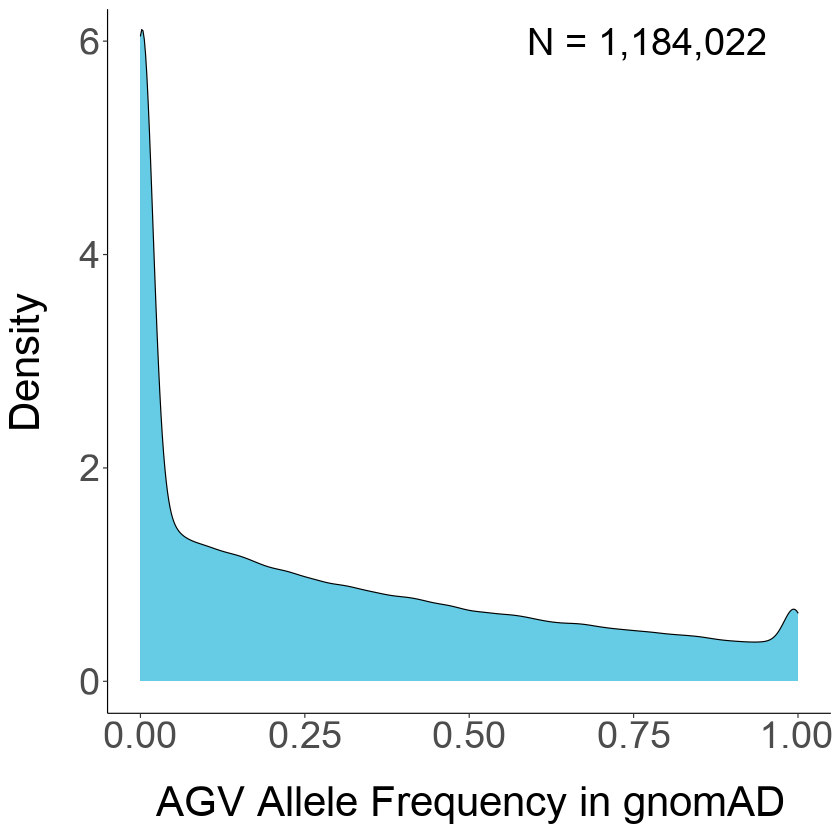

In [36]:
EAS_AGVs_AF_plot <- AGVs_allele_frequency_distribution_plot('EAS_AF', 'AGV Allele Frequency in gnomAD', EAS_color)
EAS_AGVs_AF_plot

Warning message:
“Removed 48458 rows containing non-finite values (stat_density).”


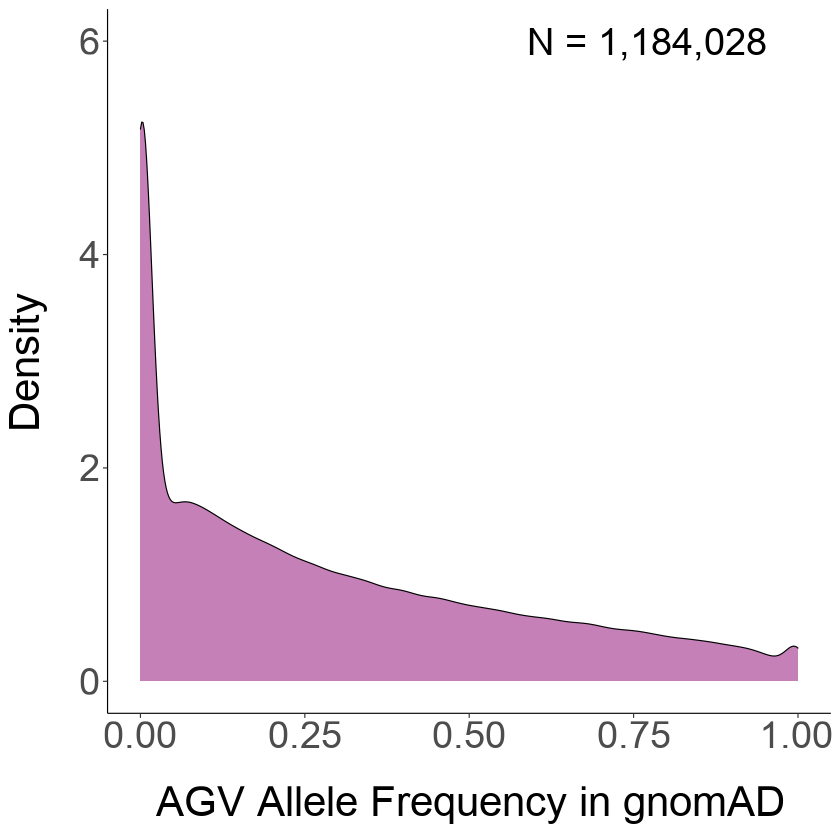

In [37]:
EUR_AGVs_AF_plot <- AGVs_allele_frequency_distribution_plot('EUR_AF', 'AGV Allele Frequency in gnomAD', EUR_color)
EUR_AGVs_AF_plot

Warning message:
“Removed 48462 rows containing non-finite values (stat_density).”


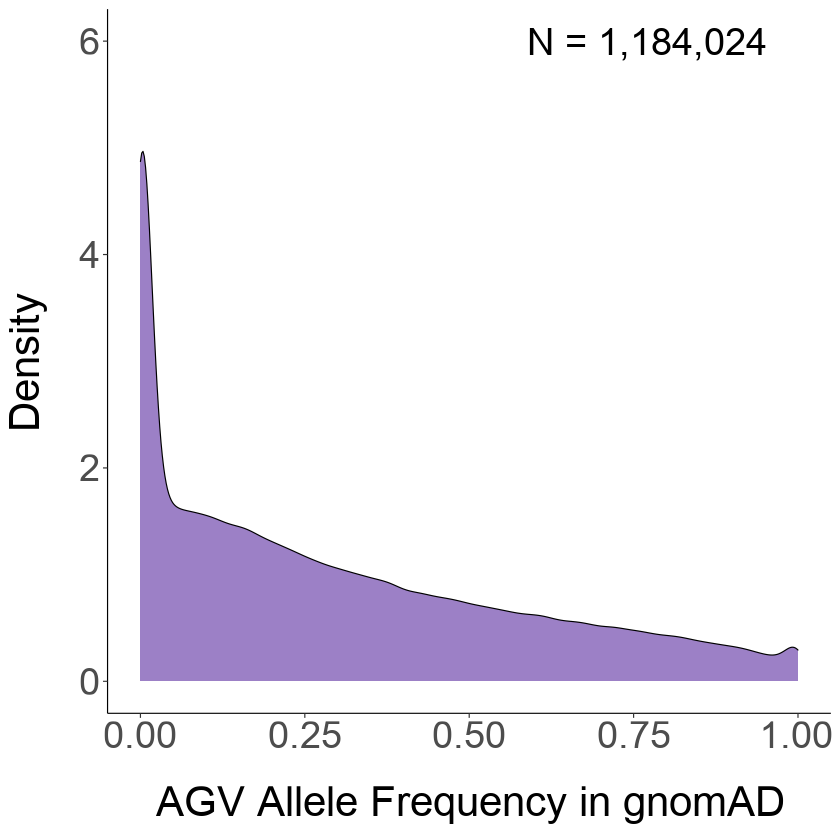

In [38]:
SAS_AGVs_AF_plot <- AGVs_allele_frequency_distribution_plot('SAS_AF', 'AGV Allele Frequency in gnomAD', SAS_color)
SAS_AGVs_AF_plot

In [39]:
right_left <- plot_grid(AFR_AGVs_AF_plot, NULL, EAS_AGVs_AF_plot, labels = c('B','','D'), label_size = 24, label_fontface = 'plain', ncol = 1, rel_heights = c(0.48,0.04,0.48), scale = 0.95)
right_right <- plot_grid(EUR_AGVs_AF_plot, NULL, SAS_AGVs_AF_plot, labels = c('C','','E'), label_size = 24, label_fontface = 'plain', ncol = 1, rel_heights = c(0.48,0.04,0.48), scale = 0.95)

Warning message:
“Removed 48458 rows containing non-finite values (stat_density).”
Warning message:
“Removed 48464 rows containing non-finite values (stat_density).”
Warning message:
“Removed 48458 rows containing non-finite values (stat_density).”
Warning message:
“Removed 48462 rows containing non-finite values (stat_density).”


Warning message:
“Removed 48455 rows containing non-finite values (stat_density).”


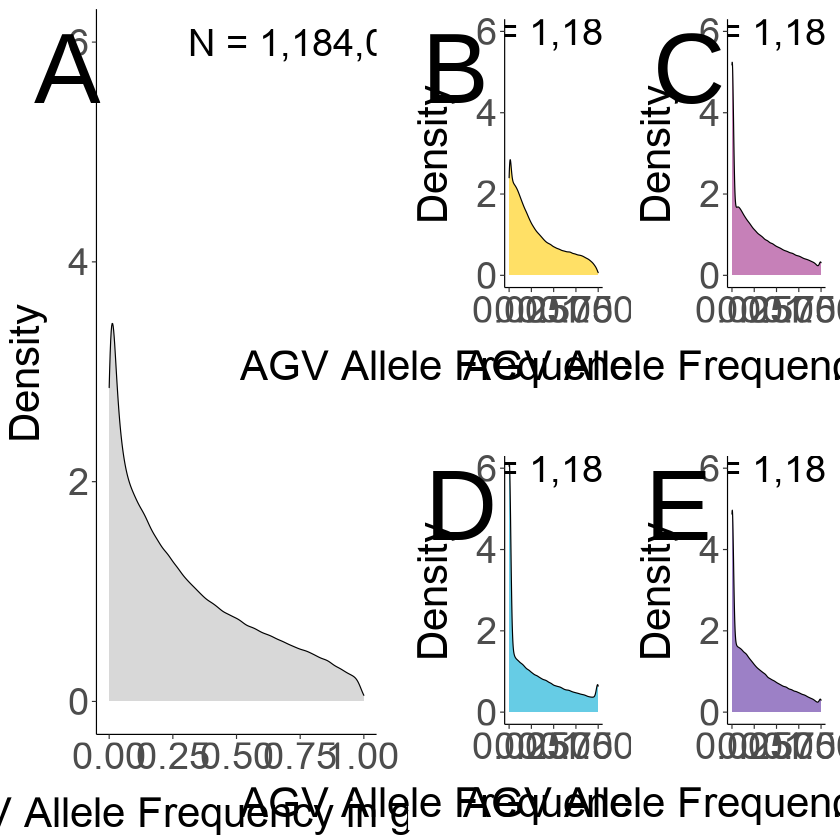

In [40]:
plot <- plot_grid(global_AGVs_AF_plot, NULL, right_left, NULL, right_right, labels = c('A','','','',''), label_size = 24, label_fontface = 'plain', nrow = 1, rel_widths = c(0.45,0.02,0.25,0.01,0.25))
plot

In [41]:
pdf('figures/suppl_figs/AGV_AF_distributions.pdf', height = 5, width = 10)
plot
dev.off()

png 
  2

### AGV Allele Frequencies by TopLD Presence/Absence <a class = 'anchor' id = 'agvallelefrequenciesbytopldpresenceabsence'></a>

In [42]:
AGVs_subset <- AGVs[is.na(AGVs$TopLD_presence), ]
nrow(AGVs_subset)

[1] 69890

In [43]:
TopLD_absent_AGVs <- subset(AGVs, is.na(TopLD_presence) & !is.na(AF), select = AF)
head(TopLD_absent_AGVs)

AF          
1   0.7117540000
8   0.8763540000
49  0.0000334063
78  0.0000459716
113 0.0001903890
147 0.0000459535

In [44]:
TopLD_absent_AGVs <- subset(AGVs, is.na(TopLD_presence) & !is.na(AF), select = AF)
TopLD_absent_AGVs$TopLD <- 'Absent'
TopLD_present_AGVs <- subset(AGVs, !is.na(TopLD_presence) & !is.na(AF), select = AF)
TopLD_present_AGVs$TopLD <- 'Present'
TopLD_AGV_AFs_by_presence_absence <- rbind(TopLD_absent_AGVs, TopLD_present_AGVs)
head(TopLD_AGV_AFs_by_presence_absence)

AF           TopLD 
1   0.7117540000 Absent
8   0.8763540000 Absent
49  0.0000334063 Absent
78  0.0000459716 Absent
113 0.0001903890 Absent
147 0.0000459535 Absent

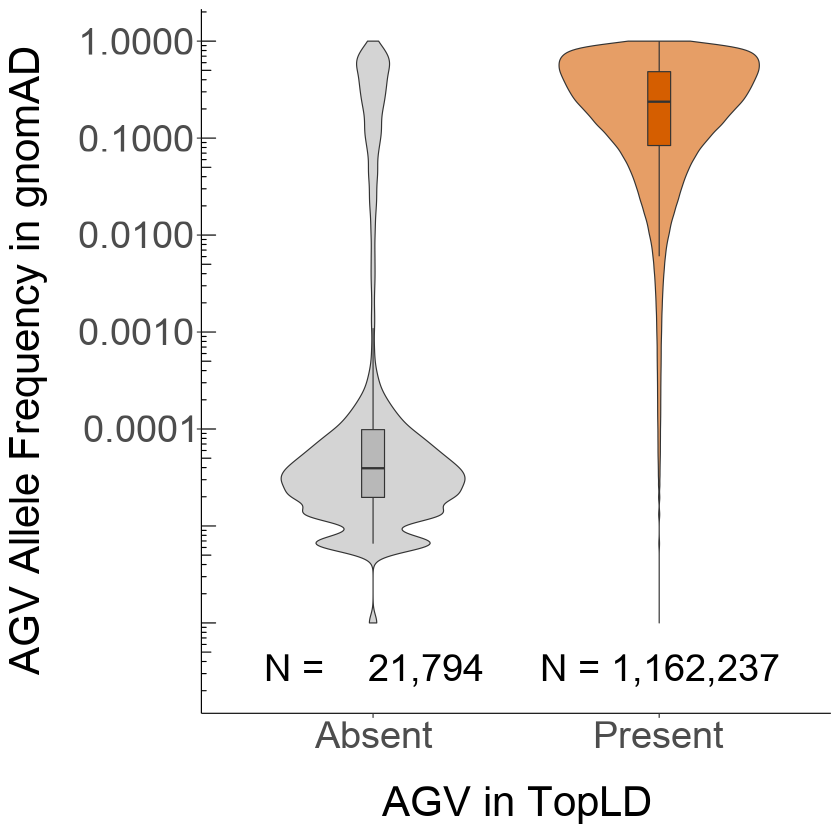

In [45]:
Ns <- TopLD_AGV_AFs_by_presence_absence %>% group_by(TopLD) %>% summarise(Ns = sum(!is.na(AF)))
Ns$Ns <- format(Ns$Ns, big.mark = ",", scientific = FALSE)

TopLD_AGV_AFs_by_presence_absence$AF[TopLD_AGV_AFs_by_presence_absence$AF == 0] <- 1e-6 # transform 0s to small number to not generates non-finite values with log transform

AGV_AFs_by_TopLD_presence <- ggplot(TopLD_AGV_AFs_by_presence_absence, aes(x = TopLD, y = AF, fill = TopLD)) + 
geom_violin(alpha = 0.6, size = (0.125/0.377), adjust = 1.3, width = 0.7) + geom_boxplot(width = 0.08, outlier.shape = NA, lwd = (0.125/0.377)) + scale_fill_manual(values = c('#b8b8b8','#d55e00')) + 
xlab('AGV in TopLD') + ylab('AGV Allele Frequency in gnomAD') + scale_y_continuous(trans = 'log10', breaks = c(0.0001, 0.001, 0.01, 0.1, 1), labels = scales::comma_format(scale = 1), limits = c(NA,1)) + 
annotation_logticks(sides = 'l', size = (0.125/0.377)) + geom_text(data = Ns, aes(x = TopLD, y = 0.00000025, label = paste("N =", Ns)), size = 9/.pt, vjust = 0, hjust = 0.5, family = 'Arial') +
fig_theme

AGV_AFs_by_TopLD_presence 

In [46]:
pdf('figures/suppl_figs/AGV_AFs_by_TopLD_presence.pdf', height = 6, width = 6)
AGV_AFs_by_TopLD_presence
dev.off()

png 
  2

## AGV Age Estimates <a class = 'anchor' id = 'agvageestimates'></a>

In [47]:
high_quality_AGV_age_estimates_single_estimate_per_variant = read.csv('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/AGV_age_estimates/high_quality_AGV_age_estimates_single_estimate_per_variant_non_missing_AF.txt', sep = '\t', header = TRUE)
head(high_quality_AGV_age_estimates_single_estimate_per_variant)

VariantID   Chromosome Position  AlleleRef AlleleAlt AlleleAnc DataSource
1 X1006057566 4          106057566 C         A         .         SGDP      
2 X1011551444 4          111551444 C         A         .         SGDP      
3 X1030537730 4          130537730 C         A         .         SGDP      
4 X1048393664 4          148393664 C         T         .         SGDP      
5 X1048996340 4          148996340 G         A         .         SGDP      
6 X10749626   1           10749626 C         A         .         SGDP      
  NumConcordant NumDiscordant AgeMode_Mut ⋯ AgeCI95Upper_Rec QualScore_Rec
1   3            93            7221.45    ⋯   974.11         0.333        
2 100            99            9092.68    ⋯ 20934.30         0.737        
3  99            99            3999.58    ⋯ 16721.70         0.677        
4 100            99            3983.99    ⋯ 16909.50         0.768        
5   6           100            7415.13    ⋯  8115.82         1.000        
6  99            99           21682.40    ⋯ 23465.80         0.697        
  AgeMode_Jnt AgeMean_Jnt AgeMedian_Jnt AgeCI95Lower_Jnt AgeCI95Upper_Jnt
1  2709.02     2679.14     2653.14       1832.75          3589.24        
2 20949.40    20633.20    20471.30      13871.80         27911.30        
3  2292.36     2287.57     2284.75       2067.80          2507.72        
4  2773.28     2768.35     2766.83       2494.55          3040.39        
5  6457.06     6879.66     6612.44       4275.96         10809.00        
6 25930.60    25909.40    25807.30      21175.30         31006.00        
  QualScore_Jnt gnomAD_AF    DataSources
1 0.667         0.0000318573 SGDP       
2 0.737         0.3062400000 SGDP       
3 0.909         0.1263340000 SGDP       
4 0.940         0.1488540000 SGDP       
5 1.000         0.0000318492 SGDP       
6 0.697         0.0663581000 SGDP

In [48]:
high_quality_AGV_age_estimates_single_estimate_per_variant_ages <- subset(high_quality_AGV_age_estimates_single_estimate_per_variant, select=c('AgeMode_Jnt'))
colnames(high_quality_AGV_age_estimates_single_estimate_per_variant_ages) <- c('age')
high_quality_AGV_age_estimates_single_estimate_per_variant_ages$set <- 'AGVs'
head(high_quality_AGV_age_estimates_single_estimate_per_variant_ages)

age      set 
1  2709.02 AGVs
2 20949.40 AGVs
3  2292.36 AGVs
4  2773.28 AGVs
5  6457.06 AGVs
6 25930.60 AGVs

In [49]:
nrow(high_quality_AGV_age_estimates_single_estimate_per_variant_ages)

[1] 946307

In [50]:
allele_frequency_matched_random_sample_for_AGV_age_estimates = read.csv('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/AGV_age_estimates/allele_frequency_matched_random_sample_for_AGV_age_estimates.txt.gz', sep = '\t', header = TRUE)
head(allele_frequency_matched_random_sample_for_AGV_age_estimates)

DataSource AgeMode_Jnt gnomAD_AF 
1 Combined   16268.300   0.00722976
2 Combined     797.126   0.00692422
3 Combined    1007.130   0.00608358
4 Combined     716.950   0.00152847
5 Combined    1741.680   0.00334501
6 Combined    6017.810   0.00633718

In [51]:
allele_frequency_matched_random_sample_for_AGV_age_estimates_ages <- subset(allele_frequency_matched_random_sample_for_AGV_age_estimates, select=c('AgeMode_Jnt'))
colnames(allele_frequency_matched_random_sample_for_AGV_age_estimates_ages) <- c('age')
allele_frequency_matched_random_sample_for_AGV_age_estimates_ages$set <- 'Allele Frequency-Matched\nRandom Variants'
head(allele_frequency_matched_random_sample_for_AGV_age_estimates_ages)

age       set                                      
1 16268.300 Allele Frequency-Matched\nRandom Variants
2   797.126 Allele Frequency-Matched\nRandom Variants
3  1007.130 Allele Frequency-Matched\nRandom Variants
4   716.950 Allele Frequency-Matched\nRandom Variants
5  1741.680 Allele Frequency-Matched\nRandom Variants
6  6017.810 Allele Frequency-Matched\nRandom Variants

In [52]:
nrow(allele_frequency_matched_random_sample_for_AGV_age_estimates_ages)

[1] 946307

In [53]:
AGV_ages_vs_controls <- rbind(high_quality_AGV_age_estimates_single_estimate_per_variant_ages, allele_frequency_matched_random_sample_for_AGV_age_estimates_ages)
AGV_ages_vs_controls$set <- factor(AGV_ages_vs_controls$set,levels = c('Allele Frequency-Matched\nRandom Variants', 'AGVs'))
head(AGV_ages_vs_controls)

age      set 
1  2709.02 AGVs
2 20949.40 AGVs
3  2292.36 AGVs
4  2773.28 AGVs
5  6457.06 AGVs
6 25930.60 AGVs

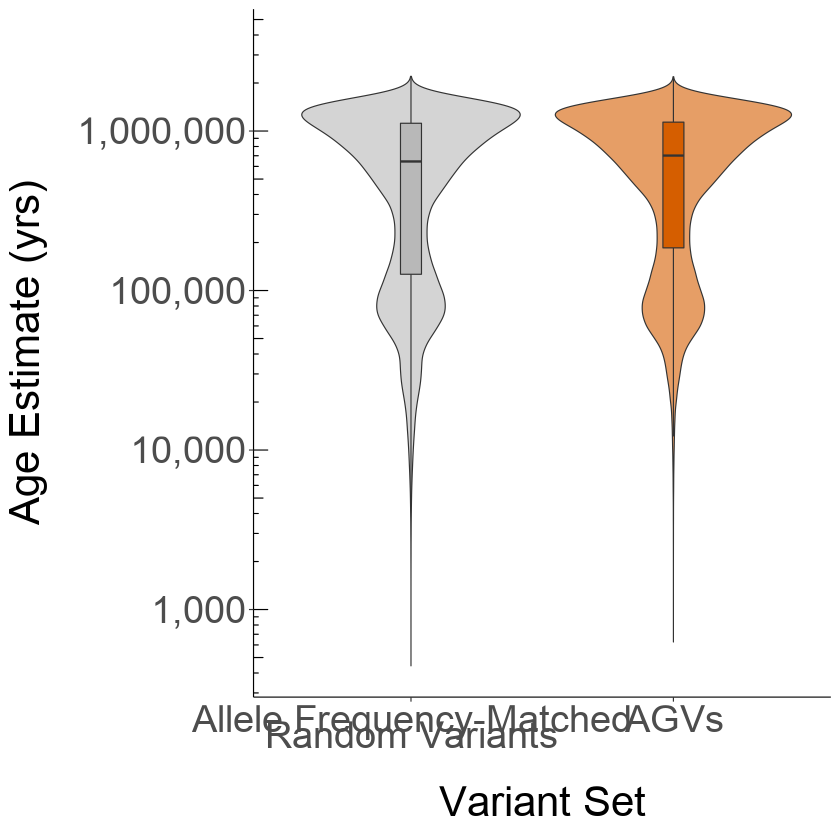

In [54]:
AGV_ages_vs_controls_plot <- ggplot(AGV_ages_vs_controls, aes(x = set, y = age*29, fill = set)) + 
geom_violin(alpha = 0.6, size = (0.125/0.377)) + geom_boxplot(width = 0.08, outlier.shape = NA, lwd = (0.125/0.377)) + scale_fill_manual(values = c('#b8b8b8','#d55e00')) + 
xlab('Variant Set') + ylab('Age Estimate (yrs)') + scale_y_continuous(trans = 'log10', breaks = trans_breaks('log10', function(x) 10^x), labels = scales::comma_format(scale = 1), limits = c(NA,3700000)) + 
annotation_logticks(sides = 'l', size = (0.125/0.377)) + fig_theme

AGV_ages_vs_controls_plot                                                      

In [55]:
pdf('figures/main_fig_components/AGV_and_allele_frequency_random_matched_variants_age_estimates.pdf', height = 7, width = 5)
AGV_ages_vs_controls_plot
dev.off()

png 
  2

## Allele Frequency Trajectory Examples <a class = 'anchor' id = 'allelefrequencytrajectoryexamples'></a>

In [56]:
process_filtered_genotypes <- function(file) {
    genotypes <- read.csv(paste('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/allele_frequency_trajectories/', file, sep = ''), header = TRUE, sep = '\t', na.strings = c("","NA"))
    genotypes$Region <- as.factor(genotypes$Region)
    genotypes$Region <- as.factor(ifelse(genotypes$Region %in% c('East Asia', 'South Asia', 'West Asia', 'Oceania'), 'Asia/Oceania', as.character(genotypes$Region)))
    genotypes <- na.omit(genotypes)

    binned_dates_bounds <- as.numeric(c(0,1000,2000,3000,4000,5000,10000,15000,20000,30000,40000,50000))
    binned_dates_labels <- paste0(1:11)
    genotypes$binned_dates <- cut(genotypes$Date_mean, breaks = binned_dates_bounds, labels = binned_dates_labels, include.lowest = TRUE)
    genotypes$binned_dates <- as.numeric(genotypes$binned_dates)

    allele_frequency_summary <- genotypes %>% group_by(binned_dates, Region) %>% summarise(sample_size = n(), allele_frequency = 1 - (sum(GT)/(n() * 2))) %>% filter(sample_size != 0, Region != 'NaN') %>% drop_na()
    return(allele_frequency_summary)
}

In [57]:
genetic_drift_variant_example <- process_filtered_genotypes('chr1_152973776.frq')
EDAR_positive_selection_variant_example <- process_filtered_genotypes('chr2_109513601.frq')
MCM6_positive_selection_variant_example <- process_filtered_genotypes('chr2_136608646.frq')

`summarise()` has grouped output by 'binned_dates'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'binned_dates'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'binned_dates'. You can override using the `.groups` argument.


In [58]:
binned_dates_plot_labels = c('[50-40)','[40-30)','[30-20)','[20-15)','[15-10)','[10-5)','[5-4)','[4-3)','[3-2)','[2-1)','[1-0]')
continent_colors <- c('#df8f44','#009e73',EAS_color,EUR_color)

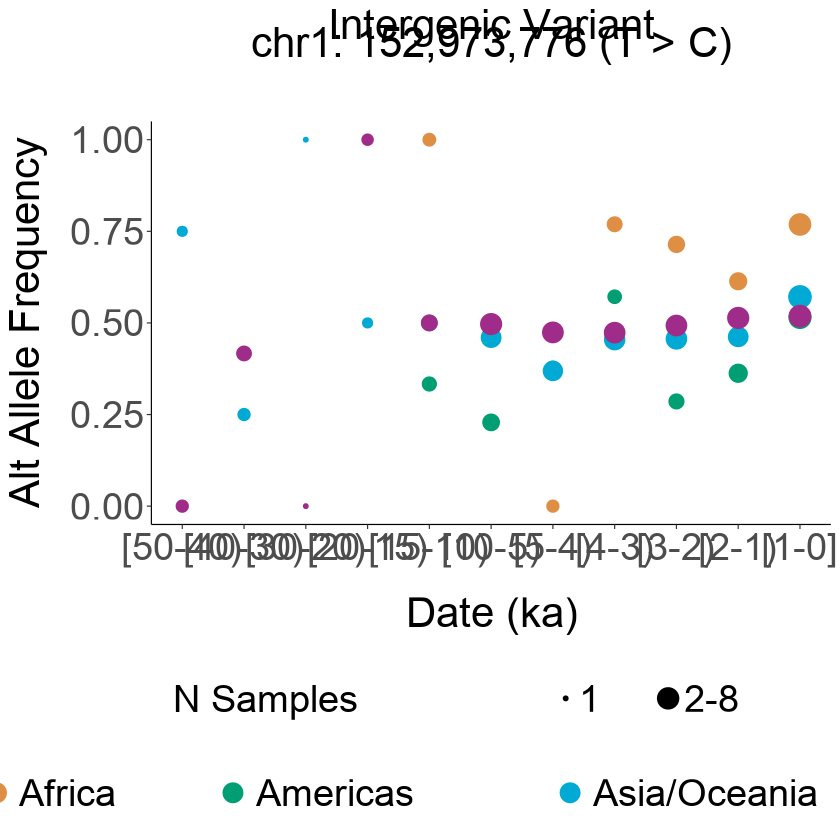

In [59]:
plot_for_legend <- ggplot(data = genetic_drift_variant_example, aes(x = binned_dates, y = allele_frequency, group = Region)) +
geom_point(aes(color = Region, size = log10(sample_size))) + scale_color_manual(values = continent_colors) +
scale_size(name = 'N Samples    ', breaks = c(0,3,6,9), labels = c('1','2-8','9-64','65+')) +
ggtitle('Intergenic Variant\nchr1: 152,973,776 (T > C)') + xlab('Date (ka)') + ylab('Alt Allele Frequency') +
scale_x_reverse(breaks = 11:1, labels = binned_dates_plot_labels) + coord_cartesian(ylim = c(0, 1)) +
theme_classic() + theme(axis.line.x.bottom = element_line(size = (0.125/0.377)), axis.line.y.left = element_line(size = (0.125/0.377)),
axis.title = element_text(size = 10), axis.text.x = element_text(size = 9), axis.text.y = element_text(size = 9),
axis.ticks = element_line(size = (0.125/0.377)), axis.title.x = element_text(margin = margin(t = 15, r = 0, b = 0, l = 0)),
axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)), legend.box = 'vertical', legend.position = 'bottom', legend.spacing.x = unit(0.06, 'cm'), 
legend.text = element_text(size = 9, margin = margin(r = 20, unit = 'pt')), legend.title = element_text(size = 9), 
plot.title = element_text(hjust = 0.5, margin = margin(t = 0, r = 0, b = 30, l = 0), size = 10), text = element_text(family = 'Arial')) +
guides(color = guide_legend(override.aes = list(shape = 20, size = 8), title = 'Region    '))

plot_for_legend

In [60]:
legend <- get_legend(plot_for_legend)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

In [61]:
plot_allele_frequency_history <- function(dataframe, variant_description, chr, pos, ref, alt) {
    plot <- ggplot(data = dataframe, aes(x = binned_dates, y = allele_frequency, group = Region)) +
    geom_point(aes(color = Region, size = log10(sample_size))) + scale_color_manual(values = continent_colors) +
    scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1)) + coord_cartesian(ylim = c(0, 1.05)) +
    scale_size(name = 'Sample Size    ', breaks = c(0,3,6,9), labels = c('1','2-8','9-64','65+')) +
    ggtitle(paste(variant_description,'\n',chr,': ',pos,' (',ref,' > ',alt,')', sep = '')) + xlab('Date (ka)') + ylab('Alt Allele Frequency') +
    scale_x_reverse(breaks = 11:1, labels = binned_dates_plot_labels) + fig_theme +
    theme(plot.title = element_text(hjust = 0.5, margin = margin(t = 0, r = 0, b = 30, l = 0), size = 10))
    
    return(plot)
}

In [62]:
genetic_drift_example_allele_frequency_plot <- plot_allele_frequency_history(genetic_drift_variant_example,'Neutral Variant - rs3753454','chr1','152,973,776','T','C')
EDAR_example_allele_frequency_plot <- plot_allele_frequency_history(EDAR_positive_selection_variant_example,'EDAR Missense Variant - rs3827760','chr2','109,513,601','A','G')
MCM6_example_allele_frequency_plot <- plot_allele_frequency_history(MCM6_positive_selection_variant_example,'LCT Enhancer Variant - rs4988235','chr2','136,608,646','G','A')

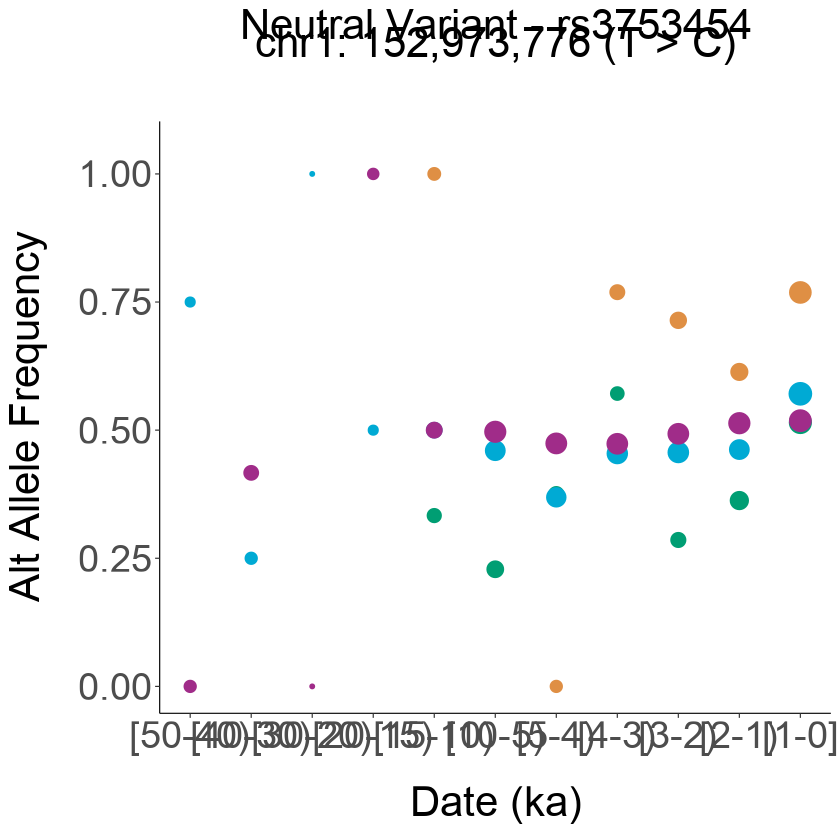

In [63]:
genetic_drift_example_allele_frequency_plot

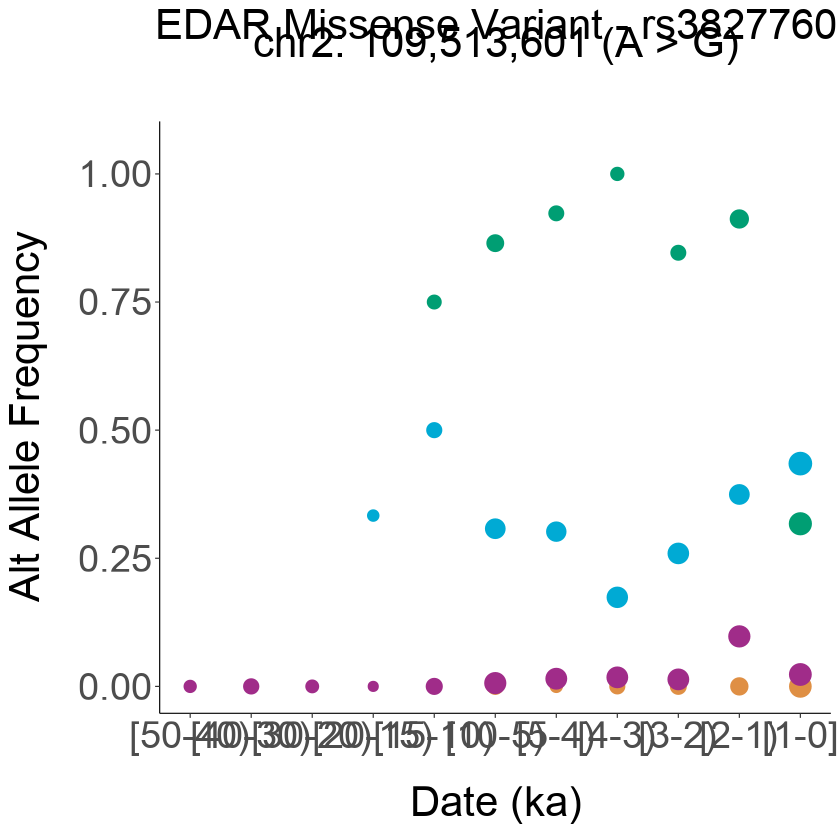

In [64]:
EDAR_example_allele_frequency_plot

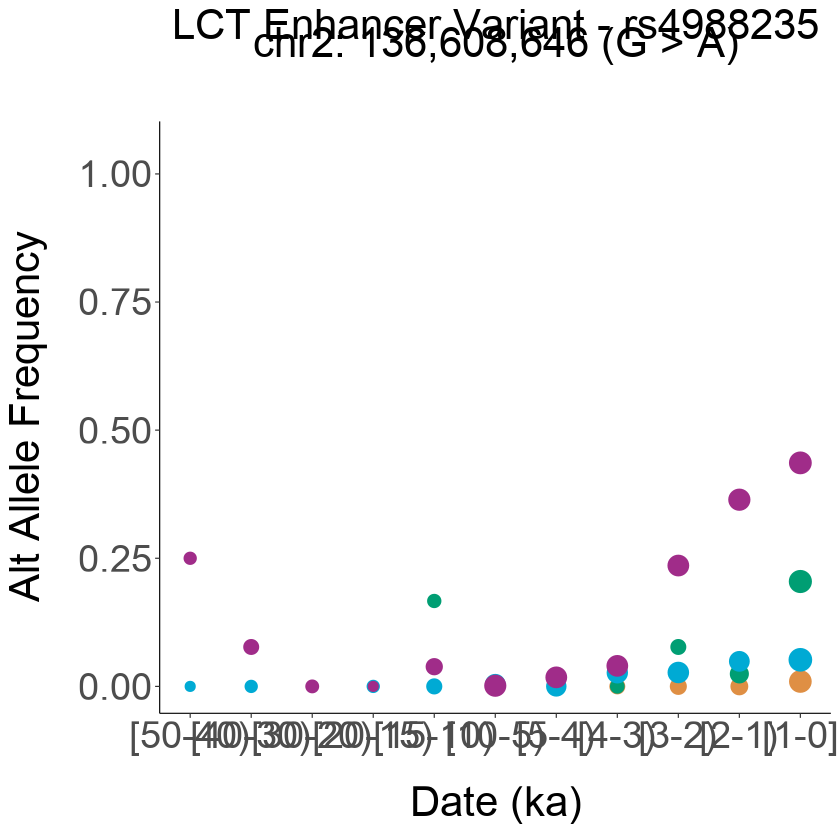

In [65]:
MCM6_example_allele_frequency_plot

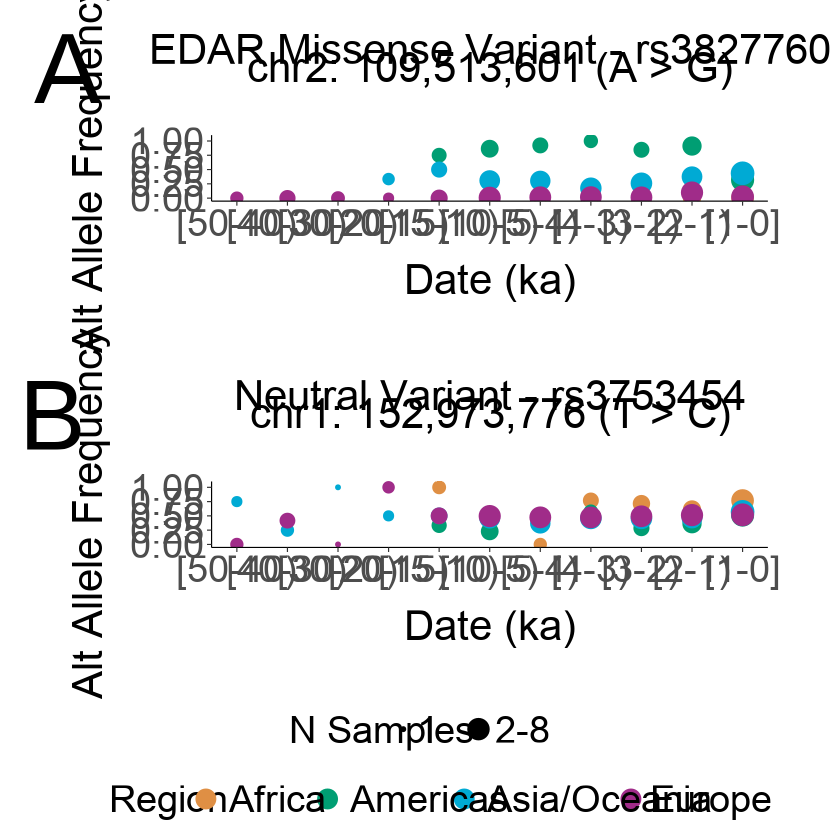

In [66]:
plot <- plot_grid(EDAR_example_allele_frequency_plot, NULL, genetic_drift_example_allele_frequency_plot, NULL, legend, labels = c('A','','B','',''), label_size = 24, label_fontface = 'plain', ncol = 1, rel_heights = c(0.45,0.02,0.45,0.02,0.2), scale = 0.85)
plot

In [67]:
pdf('figures/main_fig_components/allele_frequency_trajectory_examples.pdf', height = 7, width = 8)
plot
dev.off()

png 
  2

Let's also save the MCM6 example.

In [68]:
pdf('figures/suppl_figs/MCM6_example_allele_frequencies.pdf', height = 4, width = 10)
MCM6_example_allele_frequency_plot
dev.off()

png 
  2

## HGD Quality Scores vs. Allele Age <a class = 'anchor' id = 'hgdqualityscoresvsalleleage'></a>

In [69]:
AGVs_in_HGD <- read.csv('/wynton/group/capra/projects/ancient_genotyped_variants_proxy_catalog/data/AGV_age_estimates/AGVs_with_age_estimates_and_AFs.txt.gz', sep = '\t', header = TRUE)
head(AGVs_in_HGD)

VariantID  Chromosome Position AlleleRef AlleleAlt AlleleAnc DataSource
1 rs3094315  1          752566   G         A         .         TGP       
2 rs12124819 1          776546   A         G         .         TGP       
3 rs28765502 1          832918   T         C         .         TGP       
4 rs7419119  1          842013   T         G         T         TGP       
5 rs950122   1          846864   G         C         G         Combined  
6 rs950122   1          846864   G         C         G         SGDP      
  NumConcordant NumDiscordant AgeMode_Mut ⋯ AgeCI95Lower_Rec AgeCI95Upper_Rec
1 500           499           16898.80    ⋯ 33318.00         37869.20        
2 500           500            3174.73    ⋯  3447.67          4001.91        
3 500           500           20220.90    ⋯ 20533.80         23742.50        
4 500           493           15138.10    ⋯ 17682.10         21921.70        
5 600           598           22844.60    ⋯ 34031.90         39214.90        
6 100           100           18216.30    ⋯ 17504.10         26187.70        
  QualScore_Rec AgeMode_Jnt AgeMean_Jnt AgeMedian_Jnt AgeCI95Lower_Jnt
1 0.756         38695.60    38693.70    38660.20      35801.40        
2 0.900          3076.93     3076.79     3074.46       2873.75        
3 0.902         25899.00    25908.10    25874.60      23905.60        
4 0.773         24929.90    24912.10    24859.60      22045.40        
5 0.478         42263.00    42278.60    42226.70      39253.00        
6 0.980         27726.30    27725.10    27591.40      22370.90        
  AgeCI95Upper_Jnt QualScore_Jnt gnomAD_AF
1 41671.00         0.756         0.706299 
2  3286.54         0.892         0.189643 
3 27979.50         0.902         0.372510 
4 27875.00         0.773         0.189768 
5 45386.80         0.478         0.206207 
6 33617.60         0.980         0.206207

In [70]:
quality_score_and_allele_age_plot <- function(clock_name, clock_column_name) {
    main <- ggplot(AGVs_in_HGD, aes(x = .data[[clock_column_name]], y = AgeMode_Jnt)) + geom_hex() + scale_fill_viridis_c() + xlab(paste(clock_name, 'Quality Score')) + 
    ylab('Variant Age (generations)') + scale_y_continuous(labels = function(x) format(x, big.mark = ',', scientific = FALSE)) + fig_theme

    xdens <- axis_canvas(main, axis = 'x') + geom_density(data = AGVs_in_HGD, aes(x = .data[[clock_column_name]]), fill = 'grey', color = 'black', size = (0.125/0.377))
    ydens <- axis_canvas(main, axis = 'y', coord_flip = TRUE) + geom_density(data = AGVs_in_HGD, aes(x = AgeMode_Jnt), fill = 'grey', color = 'black', size = (0.125/0.377)) + coord_flip()
    
    p1 <- insert_xaxis_grob(main, xdens, grid::unit(.2, 'null'), position = 'top')
    p2 <- insert_yaxis_grob(p1, ydens, grid::unit(.2, 'null'), position = 'right')
    ggdraw(p2)
}

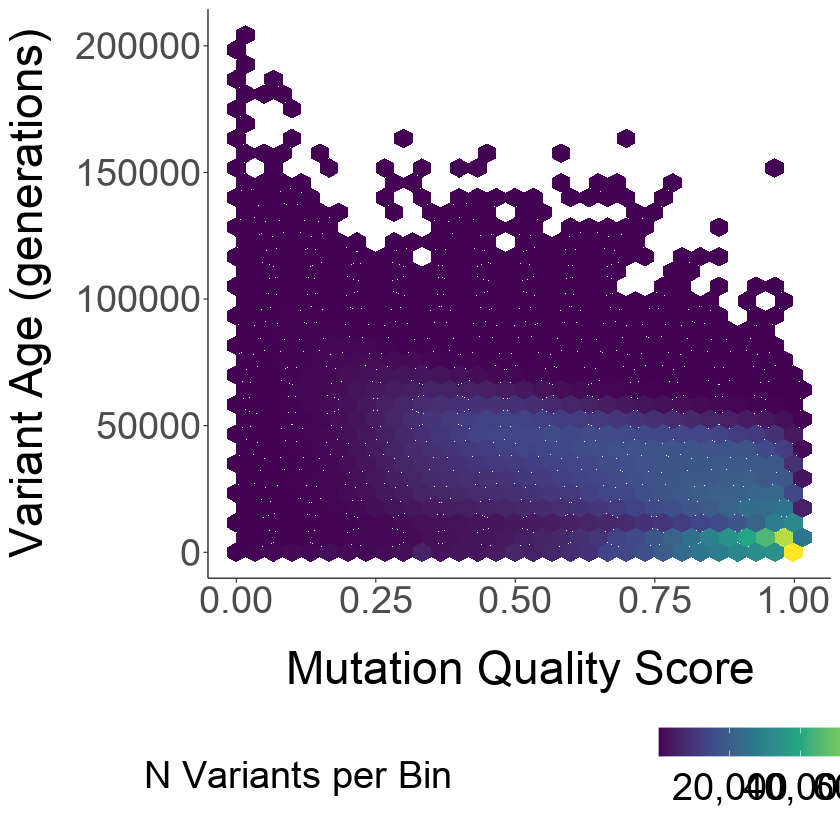

In [71]:
plot_for_legend <- ggplot(AGVs_in_HGD, aes(x = QualScore_Mut, y = AgeMode_Jnt)) + geom_hex() + scale_fill_viridis_c(labels = function(x) format(x, big.mark = ',', scientific = FALSE)) +
xlab('Mutation Quality Score') + ylab('Variant Age (generations)') + labs(fill = 'N Variants per Bin') + theme_classic() + theme(axis.line.x.bottom = element_line(size = (0.125/0.377)), 
axis.line.y.left = element_line(size = (0.125/0.377)), axis.text.x = element_text(size = 9), axis.text.y = element_text(size = 9), axis.ticks = element_line(size = (0.125/0.377)), 
axis.title.x = element_text(margin = margin(t = 15, r = 0, b = 0, l = 0)), axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)), legend.box = 'vertical',
legend.key.width = unit(1, 'cm'), legend.position = 'bottom', legend.text = element_text(size = 9), legend.title = element_text(size = 9), 
plot.title = element_text(hjust = 0.5, margin = margin(t = 0, r = 0, b = 30, l = 0), size = 10), text = element_text(family = 'Arial'))

plot_for_legend

In [72]:
legend <- get_legend(plot_for_legend)

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label

In [73]:
mutation_clock_quality_scores_and_allele_age_plot <- quality_score_and_allele_age_plot('Mutation Clock', 'QualScore_Mut')
recombination_clock_quality_scores_and_allele_age_plot <- quality_score_and_allele_age_plot('Recombination Clock', 'QualScore_Rec')
joint_clock_quality_scores_and_allele_age_plot <- quality_score_and_allele_age_plot('Joint Clock', 'QualScore_Jnt')

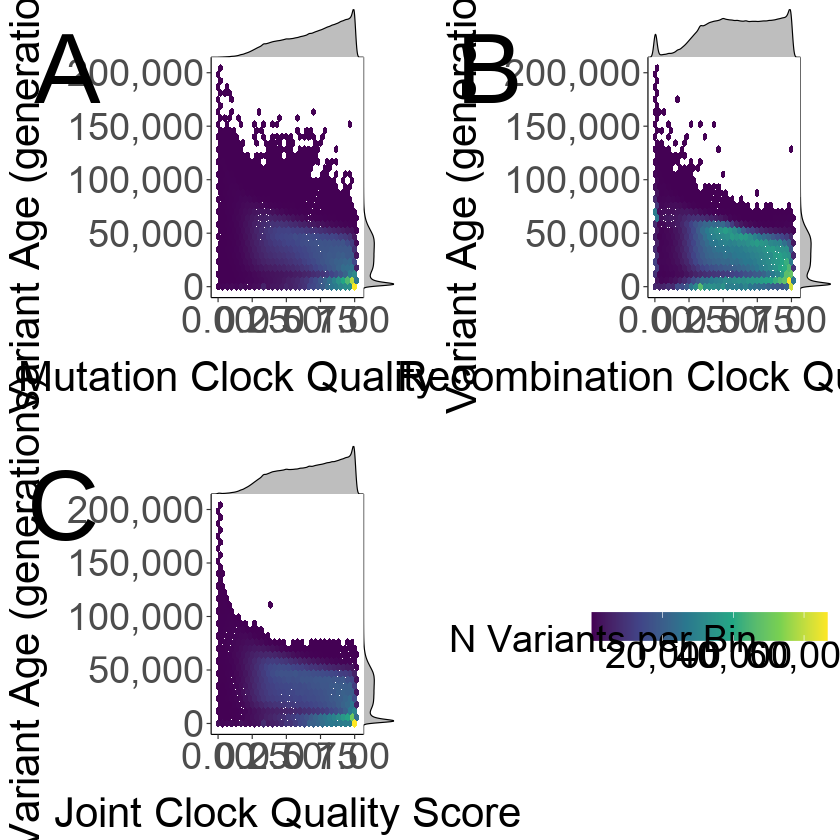

In [74]:
top_row <- plot_grid(mutation_clock_quality_scores_and_allele_age_plot, NULL, recombination_clock_quality_scores_and_allele_age_plot, labels = c('A','','B'), label_size = 24, label_fontface = 'plain', rel_widths = c(0.48,0.04,0.48), nrow = 1)
bottom_row <- plot_grid(joint_clock_quality_scores_and_allele_age_plot, NULL, legend, labels = c('C','',''), label_size = 24, label_fontface = 'plain', rel_widths = c(0.48,0.04,0.48), nrow = 1)
plot <- plot_grid(top_row, NULL, bottom_row, ncol = 1, rel_heights = c(0.48,0.04,0.48))
plot

In [75]:
pdf('figures/suppl_figs/HGD_quality_scores_and_allele_ages.pdf', height = 8, width = 8)
plot
dev.off()

png 
  2

## HGD Allele Age by Data Source <a class = 'anchor' id = 'hgdalleleagebydatasource'></a>

In [76]:
high_quality_AGV_age_estimates_with_three_estimates <- AGVs_in_HGD %>% group_by(VariantID) %>% filter(n() == 3 & all(QualScore_Jnt >= 0.5)) %>% ungroup()
head(high_quality_AGV_age_estimates_with_three_estimates)

VariantID   Chromosome Position AlleleRef AlleleAlt AlleleAnc DataSource
1 rs113171913 1          869303   C         T         C         Combined  
2 rs113171913 1          869303   C         T         C         SGDP      
3 rs113171913 1          869303   C         T         C         TGP       
4 rs13302957  1          891021   G         A         G         Combined  
5 rs13302957  1          891021   G         A         G         SGDP      
6 rs13302957  1          891021   G         A         G         TGP       
  NumConcordant NumDiscordant AgeMode_Mut ⋯ AgeCI95Lower_Rec AgeCI95Upper_Rec
1 599           596           13319.2     ⋯ 19804.90         23671.5         
2 100            99           12011.4     ⋯  7217.44         10000.0         
3 499           497           13712.1     ⋯ 19320.30         23277.9         
4 600           597           20553.1     ⋯ 36583.80         40554.5         
5 100            99           17009.7     ⋯ 29966.00         39861.4         
6 500           498           21019.7     ⋯ 37049.10         41401.7         
  QualScore_Rec AgeMode_Jnt AgeMean_Jnt AgeMedian_Jnt AgeCI95Lower_Jnt
1 0.768         17446.50    17444.7     17428.10      15969.4         
2 0.929          9788.59     9775.1      9747.98       8186.3         
3 0.922         26070.40    26072.4     26039.30      23558.9         
4 0.765         41907.30    41912.1     41879.40      39630.1         
5 0.848         39807.30    39791.1     39659.70      34121.6         
6 0.749         42277.10    42285.3     42247.80      39804.0         
  AgeCI95Upper_Jnt QualScore_Jnt gnomAD_AF
1 18960.1          0.923         0.0855078
2 11463.7          0.929         0.0855078
3 28644.0          0.922         0.0855078
4 44256.5          0.765         0.8851160
5 45840.6          0.848         0.8851160
6 44841.7          0.749         0.8851160

In [77]:
nrow(high_quality_AGV_age_estimates_with_three_estimates)/3

[1] 637502

In [78]:
high_quality_AGV_age_estimates_with_three_estimates %>% group_by(DataSource) %>% summarise_at(vars(AgeMode_Jnt), list(mean = mean))

DataSource mean    
1 Combined   23841.76
2 SGDP       22026.79
3 TGP        24045.82

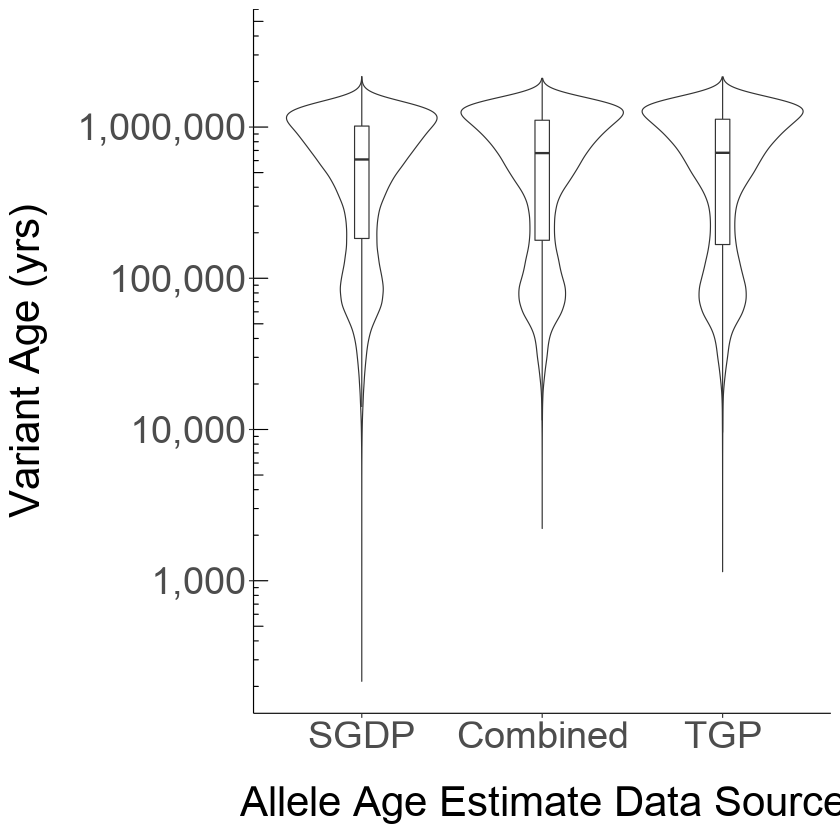

In [79]:
high_quality_AGV_age_estimates_with_three_estimates_plot <- ggplot(high_quality_AGV_age_estimates_with_three_estimates, aes(x = factor(DataSource, levels = c('SGDP', 'Combined', 'TGP')), y = AgeMode_Jnt*29)) + 
geom_violin(alpha = 0.6, size = (0.125/0.377), fill = 'white') + geom_boxplot(width = 0.08, outlier.shape = NA, lwd = (0.125/0.377), fill = 'white') + xlab('Allele Age Estimate Data Source') + 
ylab('Variant Age (yrs)') + scale_y_continuous(trans = 'log10', breaks = trans_breaks('log10', function(x) 10^x), labels = scales::comma_format(scale = 1), limits = c(NA,3700000)) + 
annotation_logticks(sides = 'l', size = (0.125/0.377)) + fig_theme

high_quality_AGV_age_estimates_with_three_estimates_plot 

In [80]:
pdf('figures/suppl_figs/high_quality_AGV_age_estimates_with_three_estimates.pdf', height = 8, width = 8)
high_quality_AGV_age_estimates_with_three_estimates_plot
dev.off()

png 
  2